In [5]:
import pyten as ptn
import numpy as np
import sys, csv, os, traceback
import matplotlib.pyplot as plt
pp=os.path.dirname(os.getcwd())
#sys.path.append(os.path.abspath(os.path.dirname("../codes/src")))          #used this, be careful
sys.path.append(os.path.abspath(os.path.dirname(pp + "/codes/src")))          #used this, be careful
print(sys.path)
from decimal import Decimal

['/home/m/Mert.Kurttutan/Academia/Codes/Physics/Projects/qh_fm_01/notebooks', '/project/theorie/s/Sam.Mardazad/Group/build/avx/ext_pypdir', '', '/software/opt/bionic/x86_64/python/3.7-2019.07/lib/python3.7/site-packages', '/software/opt/bionic/x86_64/python/3.7-2019.07/lib/python37.zip', '/software/opt/bionic/x86_64/python/3.7-2019.07/lib/python3.7', '/software/opt/bionic/x86_64/python/3.7-2019.07/lib/python3.7/lib-dynload', '/software/opt/bionic/x86_64/python/3.7-2019.07/lib/python3.7/site-packages/IPython/extensions', '/home/m/Mert.Kurttutan/.ipython', '/home/m/Mert.Kurttutan/Academia/Codes/Physics/Projects/qh_fm_01/codes', '/home/m/Mert.Kurttutan/Academia/Codes/Physics/Projects/qh_fm_01/codes']


In [6]:
from src import helpers, utils, DMRG

In [7]:
def do_plot_density(par, N_arr, g_arr, s_arr, tar_loc_n, y_0, y_lim_up, y_lim_down, legend_loc, pre_str, vs="00"):
    chis = [100, 100, 200, 200, 400, 400, 400, 800, 800, 800, 800, 1600, 1600, 1600, \
        2000, 2000, 2000, 4000, 4000, 4000, 4000, 4000, 4000]
    #plot
    plt.figure(figsize=(14, 10), dpi=80)
    for M in N_arr:
        for g in g_arr:
            for s in s_arr:
                par.N=M
                par.S=float(par.N/2)*s
                par.g=g
                try:
                    var = '%.2E' % Decimal(helpers.print_DMRG_table(par)[-1,0])
                    dens = "{:.2f}".format(par.N/((par.Lx-1)*par.Ly))
                    n = helpers.load_arr_high_bond(par, tar_loc_n, chis, "n")
                    X = np.arange(0, n.shape[0])
                    Y = n[:,y_0]
                    plt.plot(X, Y, '--o',label="n= " + dens
                             + " - " + "S="+str(par.S) + ", g=" + str(par.g)+ " -- " + "var=" + var)
                except:
                    pass

    # Naming the x-axis, y-axis and the whole graph
    plt.xlabel("$x$")
    plt.ylabel("Particle Density with pinning potential")
    plt.ylim(y_lim_down, y_lim_up)
    plt.title("Particle Density in x-direction - $L_x$,$L_y$=" + str(par.Lx)+ "," + str(par.Ly))

    # Adding legend, which helps us recognize the curve according to it's color
    plt.legend(loc=legend_loc, prop={'size':12})
    #plt.axhline(y=0.0, color='r', linestyle='-')
    #plt.show()
    fl_name = pre_str + "_" + str(par.Lx).zfill(2) + "_" + str(par.Ly).zfill(2) + "_" + vs + ".png"
    plt.savefig(fl_name)

In [8]:
def do_plot_correlation_spin(par, N_arr, g_arr, s_arr, tar_loc_n, tar_loc_corr, y_0, y_lim_up, 
                             y_lim_down, legend_loc, pre_str,vs="00"):
    chis = [100, 100, 200, 200, 400, 400, 400, 800, 800, 800, 800, 1600, 1600, 1600, \
        2000, 2000, 2000, 4000, 4000, 4000, 4000, 4000, 4000]
    locs = [0, par.Lx-1, par.Lx//2, par.Lx//2+1, par.Lx//2+2, par.Lx//2+3, par.Lx//2+4]
    #plot
    plt.figure(figsize=(14, 10), dpi=80)
    for M in N_arr:
        for g in g_arr:
            for s in s_arr:
                for idx in range(len(locs)*0+1):
                    idx = 2
                    par.N=M
                    par.S=float(par.N/2)*s
                    par.g=g
                    try:
                        var = '%.2E' % Decimal(helpers.print_DMRG_table(par)[-1,0])
                        dens = "{:.2f}".format(par.N/((par.Lx-1)*par.Ly))
                        SS=helpers.load_arr_high_bond(par, tar_loc_corr, chis, "ss", len(locs));
                        #nn=helpers.load_arr_high_bond(par, tar_loc_corr, chis, "nn", len(locs));
                        n = helpers.load_arr_high_bond(par, tar_loc_n, chis, "n")
                        X = SS[idx, :, 1].astype(int)
                        Y = SS[idx, :, 0]
                        #Y = np.divide(Y - 3/4*nn[idx, :, 0], n[X, 0])/n[locs[i],0] 
                        Y = np.divide(Y, n[X, 0])/n[locs[idx],0] 
                        #Y = np.divide(nn[0, 1:, 0], n[X[1:],0])/n[0,0] - 1                  
                        plt.plot(X, Y, '--o',label="n= " + dens+ " - " + 
                                 "S="+str(par.S) + ", g=" + str(par.g) + " -- " + "var=" + var)
                    except Exception:
                        #traceback.print_exc()
                        pass

    # Naming the x-axis, y-axis and the whole graph
    plt.xlabel("$x$")
    par.S = float(par.N/2)*s_arr[0]
    plt.ylabel("Corr function in x-direction")
    plt.ylim(y_lim_down, y_lim_up)
    plt.title("Correlation function in x-direction - $L_x$,$L_y$=" + str(par.Lx)+ "," + 
              str(par.Ly) + " - Spin_i location=" + str(locs[2]))

    # Adding legend, which helps us recognize the curve according to it's color
    plt.legend(loc=legend_loc, prop={'size':12})
    #plt.axhline(y=0.0, color='r', linestyle='-')
    #plt.show()
    fl_name = pre_str + "_" + str(par.Lx).zfill(2) + "_" + str(par.Ly).zfill(2) + "_" + vs + ".png"
    plt.savefig(fl_name)

Start with presentation of data stored in .dat file for a given

In [9]:
#parameters for the state to explained below
p = helpers.params();
p.target = "../codes" + "/data/dat-files-03-DMRG-table/"                 #the location dat files are stored
p.Lx=21; p.Ly=5; p.Nphi=(p.Lx-1)*p.Ly*0.2; p.U=8.; p.N=int(p.Nphi//2*2)+4; p.S=p.N/2.*0;
p.pin=True
p.g=-0.1
helpers.print_DMRG_table(p)[-1,0]

DMRG Table for Lx21_Ly5_Nphi20.0_U8.0_N24_S0.0_g-0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.5378117936 |              100 |      -67.5343856725 | -67.5343856725 |       956.2556316853 |
| 0.7287694120 |              100 |       -0.1737353217 | -67.7081209942 |      1072.4927442074 |
| 0.0919028657 |              200 |       -0.1599723807 | -67.8680933749 |      2003.0326988697 |
| 0.0923635201 |              200 |       -0.0000468015 | -67.8681401764 |      1928.6917068958 |
| 0.1143534388 |              400 |       -0.0508396229 | -67.9189797993 |      7115.6743342876 |
| 0.1065497339 |              400 |       -0.0182388531 | -67.9372186524 |      7036.3657279015 |
| 0.1067877362 |              400 |       -0.0000717779 | -67.9372904304 |      6884.7480804920 |
| 0.03700

'0.0003600629670472699'

In [10]:
#spin-spin correlation to see long-range spin order
#load the particle density to txt file, and then to numpy array, then plot as a function of x
chis = [100, 100, 200, 200, 400, 400, 400, 800, 800, 800, 800, 1600, 1600, 1600, \
        2000, 2000, 2000, 4000, 4000, 4000, 4000, 4000, 4000]
p1=helpers.params()
p1.folder="QH_FM4"; p1.Lx=12; p1.Ly=5; p1.Nphi=(p1.Lx-1)/5*p1.Ly; p1.U=8.0; p1.N=12; p1.S=float(p1.N/2)*0; p1.pbc=True; 
p1.lat=ptn.mp.lat.su2u1.genFermiHubbardSpinCharge(p1.Lx*p1.Ly)

In [11]:
tar_loc_corr="../codes/data/dat-files-03-expc-arr/corr-func-arr/"
tar_loc_n="../codes/data/dat-files-03-expc-arr/n-arr/"

DMRG Table for Lx21_Ly5_Nphi20.0_U8.0_N18_S0.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.1927371550 |              100 |      -52.4600031445 | -52.4600031445 |       586.2666728497 |
| 0.2050085693 |              100 |       -0.0414297727 | -52.5014329172 |       604.5523674488 |
| 0.0798024690 |              200 |       -0.1008809527 | -52.6023138699 |      1397.2695364952 |
| 0.0829235738 |              200 |       -0.0025381945 | -52.6048520644 |      1244.9311859608 |
| 0.0417183046 |              400 |       -0.3252335179 | -52.9300855823 |      4575.8942387104 |
| 0.0417195148 |              400 |       -0.0000014056 | -52.9300869880 |      4235.6061241627 |
| 0.0417203909 |              400 |       -0.0000001856 | -52.9300871736 |      3585.5402402878 |
| 0.011580

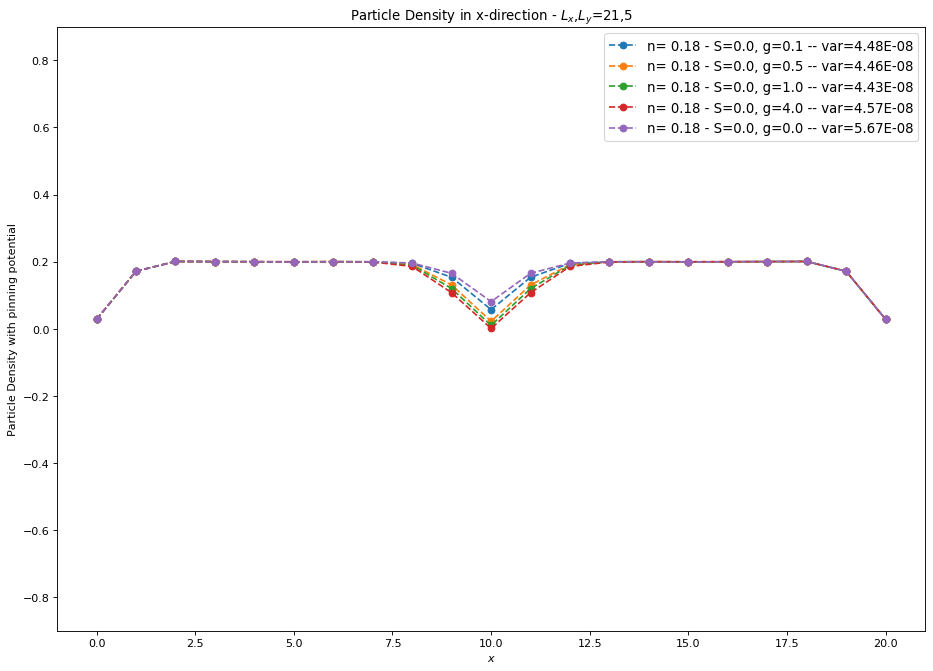

In [12]:
par = p
g_arr = np.array([0.1, -0.1, 0.5, -0.5, 1.0, -1.0, 4.0, -4.0, 0.])
N_arr = np.arange(int(par.Nphi//2*2)-2, int(par.Nphi//2*2)+0, 2)
tar_loc_n="../codes/data/dat-files-03-expc-arr/n-arr/"
s_arr = np.array([0])
y_0=0
y_lim_up=0.9; y_lim_down=-0.9
pre_str = "DMRG_pin_dens_01"
do_plot_density(par, N_arr, g_arr, s_arr, tar_loc_n, y_0, y_lim_up, y_lim_down, "upper right", pre_str, vs="00")

DMRG Table for Lx21_Ly4_Nphi16.0_U8.0_N12_S0.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0074166996 |              100 |      -35.1703184028 | -35.1703184028 |       240.1883940697 |
| 0.0287510751 |              100 |       -0.0224588380 | -35.1927772408 |       315.5694470406 |
| 0.0008030723 |              200 |       -0.0266754840 | -35.2194527249 |       673.0576646328 |
| 0.0007989406 |              200 |       -0.0000024315 | -35.2194551564 |       632.7585422993 |
| 0.0000871938 |              400 |       -0.0002555353 | -35.2197106917 |      2142.1140320301 |
| 0.0002266778 |              400 |       -0.0000810252 | -35.2197917170 |      2327.1806676388 |
| 0.0002372709 |              400 |       -0.0089503645 | -35.2287420815 |      2462.0151755810 |
| 0.000017

DMRG Table for Lx21_Ly4_Nphi16.0_U8.0_N12_S6.0_g-1.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx21_Ly4_Nphi16.0_U8.0_N12_S6.0_g4.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0004709280 |              100 |      -35.2436237418 | -35.2436237418 |       279.6696386337 |
| 0.0004664245 |              100 |       -0.0000053919 | -35.2436291337 |       305.4444849491 |
| 0.0001284479 |              200 |       -0.0000641626 | -35.2436932963 |       686.4194495678 |
| 0.0001282939 |              200 |       -0.0000000650 | -35.2436933613 |       664.6900923252 |
| 0.0000140069 |              400 |       -0.0000171165 | -35.2437104778 |       621.2353494167 |
| 0.0000087624 |              400 |       -0.0000007426 | -35.2437112204 |       811.8156292439 |

DMRG Table for Lx21_Ly4_Nphi16.0_U8.0_N14_S7.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0000986253 |              100 |      -41.0720610167 | -41.0720610167 |       326.6180181503 |
| 0.0000966217 |              100 |       -0.0000002605 | -41.0720612772 |       306.6652476788 |
| 0.0000295428 |              200 |       -0.0000090227 | -41.0720702999 |       709.2657244205 |
| 0.0000285400 |              200 |       -0.0000001390 | -41.0720704389 |       742.7224745750 |
| 0.0000081599 |              400 |       -0.0000023773 | -41.0720728162 |      1182.3642399311 |
| 0.0000044948 |              400 |       -0.0000004259 | -41.0720732421 |      1270.5432753563 |
| 0.0000016101 |              400 |       -0.0000003415 | -41.0720735836 |      1380.5172383785 |
| 0.000000

DMRG Table for Lx21_Ly4_Nphi16.0_U8.0_N18_S0.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx21_Ly4_Nphi16.0_U8.0_N18_S0.0_g-0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0745764791 |              100 |      -51.0896591296 | -51.0896591296 |       512.1258368492 |
| 0.0787411570 |              100 |       -0.0003351748 | -51.0899943044 |       523.4128735065 |
| 0.0305139025 |              200 |       -0.0212036142 | -51.1111979187 |      1070.3935003281 |
| 0.0305601286 |              200 |       -0.0000057597 | -51.1112036784 |      1054.2838981152 |
| 0.0029146463 |              400 |       -0.2990072144 | -51.4102108928 |      3855.7810580730 |
| 0.0029823169 |              400 |       -0.0000067082 | -51.4102176010 |      3557.8557233810 |

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0002607768 |              100 |      -50.7505894295 | -50.7505894295 |       410.0760908127 |
| 0.0002515315 |              100 |       -0.0000006553 | -50.7505900848 |       392.4729020596 |
| 0.0000654719 |              200 |       -0.0000266575 | -50.7506167423 |       856.3160891533 |
| 0.0000651231 |              200 |       -0.0000000384 | -50.7506167808 |       928.4414927959 |
| 0.0000320252 |              400 |       -0.0000041761 | -50.7506209569 |      1744.3506069183 |
| 0.0000185174 |              400 |       -0.0000015663 | -50.7506225232 |      2247.7127845287 |
| 0.0000128108 |              400 |       -0.0000006402 | -50.7506231633 |      2476.2911486626 |
| 0.0000064440 |              800 |       -0.0000007173 | -50.7506238806 |      2919.0308601856 |
| 0.0000023812 |    

DMRG Table for Lx21_Ly4_Nphi16.0_U8.0_N20_S10.0_g1.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx21_Ly4_Nphi16.0_U8.0_N20_S10.0_g-1.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0144633901 |              100 |      -53.2968712528 | -53.2968712528 |       365.0953879356 |
| 0.0146294472 |              100 |       -0.0000801713 | -53.2969514241 |       278.6177821159 |
| 0.0026714184 |              200 |       -0.0026774041 | -53.2996288282 |       574.7154047489 |
| 0.0026588649 |              200 |       -0.0000009784 | -53.2996298066 |       618.8076593876 |
| 0.0009252261 |              400 |       -0.0002692672 | -53.2998990738 |      1914.7092652321 |
| 0.0007385051 |              400 |       -0.0000300305 | -53.2999291042 |      2423.5162355900

DMRG Table for Lx21_Ly5_Nphi20.0_U8.0_N16_S8.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0111356462 |              100 |      -47.1998248601 | -47.1998248601 |       183.4666302204 |
| 0.0118123069 |              100 |       -0.0001215333 | -47.1999463934 |       187.0912833214 |
| 0.0093859502 |              200 |       -0.0220387632 | -47.2219851566 |       673.7247378826 |
| 0.0093963740 |              200 |       -0.0000003962 | -47.2219855528 |       659.3183126450 |
| 0.0004695408 |              400 |       -0.0027000870 | -47.2246856398 |      1886.8819956779 |
| 0.0004257217 |              400 |       -0.0000054307 | -47.2246910706 |      2688.6536986828 |
| 0.0003829590 |              400 |       -0.0000042231 | -47.2246952937 |      2773.3654105663 |
| 0.000007

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.2660171600 |              100 |      -52.4197979693 | -52.4197979693 |       643.6532351971 |
| 0.2672886902 |              100 |       -0.0000960386 | -52.4198940078 |       606.4555492401 |
| 0.1116194696 |              200 |       -0.0952978771 | -52.5151918849 |      1432.0332512856 |
| 0.1122803245 |              200 |       -0.0000241767 | -52.5152160616 |      1314.4895980358 |
| 0.0334211566 |              400 |       -0.0637378438 | -52.5789539055 |      4779.3950121403 |
| 0.0334238763 |              400 |       -0.0000042532 | -52.5789581587 |      5023.1282334328 |
| 0.0333295501 |              400 |       -0.0000213676 | -52.5789795262 |      5186.6341736317 |
| 0.0004226323 |              800 |       -0.4437368085 | -53.0227163347 |     22015.3420629501 |
| 0.0001273050 |    

DMRG Table for Lx21_Ly5_Nphi20.0_U8.0_N20_S0.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx21_Ly5_Nphi20.0_U8.0_N20_S10.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx21_Ly5_Nphi20.0_U8.0_N20_S0.0_g-0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx21_Ly5_Nphi20.0_U8.0_N20_S10.0_g-0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx21_Ly5_Nphi20.0_U8.0_N20_S0.0_g0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx21_Ly5_Nphi20.0_U8.0_N20_S10.0_g0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx21_Ly5_Nphi20.0_U8.0_N20_S0.0_g-0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx21_Ly5_Nphi20.0_U8.0_N20_S10.0_g-0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx21_Ly5_Nphi20.0_U8.0_N20_S0.0_g1.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx21_

DMRG Table for Lx21_Ly5_Nphi20.0_U8.0_N22_S11.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx21_Ly5_Nphi20.0_U8.0_N22_S11.0_g-0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0387311665 |              100 |      -62.3563105182 | -62.3563105182 |       684.7177891731 |
| 0.0390867615 |              100 |       -0.0000328225 | -62.3563433407 |       642.7451312542 |
| 0.0086381300 |              200 |       -0.0079802445 | -62.3643235851 |      1732.1585204601 |
| 0.0090906959 |              200 |       -0.0000216672 | -62.3643452524 |      1650.5412666798 |
| 0.0011245922 |              400 |       -0.0011679183 | -62.3655131706 |      4980.7479405403 |
| 0.0011266148 |              400 |       -0.0000028918 | -62.3655160624 |      4904.7379975319

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.6581615268 |              100 |      -67.4812689713 | -67.4812689713 |       503.0107173920 |
| 1.0186426263 |              100 |       -0.2216113964 | -67.7028803677 |       455.8203153610 |
| 0.2747356881 |              200 |       -0.5685493249 | -68.2714296926 |      1263.3489773273 |
| 0.2745492508 |              200 |       -0.0001025253 | -68.2715322179 |      1217.6546998024 |
| 0.0280758047 |              400 |       -0.0587620218 | -68.3302942397 |      5093.0257909298 |
| 0.0572458690 |              400 |       -0.0572184079 | -68.3875126476 |      5364.3407866955 |
| 0.0572912134 |              400 |       -0.0000055925 | -68.3875182402 |      4926.6401124001 |
| 0.0067888884 |              800 |       -0.0113094719 | -68.3988277121 |     21073.2131142616 |
| 0.0067820840 |    

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0990393279 |              100 |      -64.6276613687 | -64.6276613687 |       454.1616389751 |
| 0.0994122627 |              100 |       -0.0002463660 | -64.6279077347 |       345.0040078163 |
| 0.0576697582 |              200 |       -0.0151183760 | -64.6430261107 |       930.1980683804 |
| 0.0579314361 |              200 |       -0.0000475251 | -64.6430736358 |      1003.5027544498 |
| 0.0137209788 |              400 |       -0.0171573019 | -64.6602309377 |      3657.2042243481 |
| 0.0136616189 |              400 |       -0.0000069716 | -64.6602379093 |      4503.2829756737 |
| 0.0136561381 |              400 |       -0.0000004880 | -64.6602383973 |      4579.0982072353 |
| 0.0016615497 |              800 |       -0.0018391760 | -64.6620775733 |     12817.8669493198 |
| 0.0013039478 |    

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0053314650 |              100 |      -58.7322738072 | -58.7322738072 |       787.1520292759 |
| 0.0054102049 |              100 |       -0.0000058122 | -58.7322796195 |       435.1773331165 |
| 0.0017222171 |              200 |       -0.0010980723 | -58.7333776918 |       647.4550321102 |
| 0.0013194837 |              200 |       -0.0000659575 | -58.7334436493 |      1313.8675808907 |
| 0.0001878367 |              400 |       -0.0002880233 | -58.7337316725 |      2698.5749914646 |
| 0.0000979464 |              400 |       -0.0000191362 | -58.7337508088 |      3472.0713996887 |
| 0.0000579263 |              400 |       -0.0000089058 | -58.7337597146 |      4200.8682608604 |
| 0.0000030809 |              800 |       -0.0000097221 | -58.7337694367 |      6751.3472032547 |
| 0.0000010323 |    

/software/opt/bionic/x86_64/python/3.7-2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


DMRG Table for Lx31_Ly4_Nphi24.0_U8.0_N22_S11.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0031575457 |              100 |      -64.5542766876 | -64.5542766876 |      1014.7770521641 |
| 0.0032069218 |              100 |       -0.0000010129 | -64.5542777005 |       626.5638694763 |
| 0.0007891032 |              200 |       -0.0015899107 | -64.5558676112 |      2090.0666437149 |
| 0.0004244446 |              200 |       -0.0000954831 | -64.5559630943 |      2137.3190109730 |
| 0.0000072785 |              400 |       -0.0000643141 | -64.5560274084 |      3585.6615200043 |
| 0.0000021750 |              400 |       -0.0000005751 | -64.5560279835 |      4476.7546603680 |
| 0.0000007165 |              400 |       -0.0000001735 | -64.5560281570 |      4947.3773748875 |
| 0.00000

DMRG Table for Lx31_Ly4_Nphi24.0_U8.0_N24_S0.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly4_Nphi24.0_U8.0_N24_S12.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly4_Nphi24.0_U8.0_N24_S0.0_g-0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly4_Nphi24.0_U8.0_N24_S12.0_g-0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly4_Nphi24.0_U8.0_N24_S0.0_g0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly4_Nphi24.0_U8.0_N24_S12.0_g0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly4_Nphi24.0_U8.0_N24_S0.0_g-0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly4_Nphi24.0_U8.0_N24_S12.0_g-0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly4_Nphi24.0_U8.0_N24_S0.0_g1.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_

DMRG Table for Lx31_Ly4_Nphi24.0_U8.0_N26_S13.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly4_Nphi24.0_U8.0_N26_S13.0_g-0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0170046917 |              100 |      -73.9871392102 | -73.9871392102 |      1007.1467881203 |
| 0.0169734554 |              100 |       -0.0000017204 | -73.9871409306 |       918.8369967937 |
| 0.0006629740 |              200 |       -0.0027447114 | -73.9898856420 |      1828.5803430080 |
| 0.0005348520 |              200 |       -0.0000179724 | -73.9899036144 |      2072.7855639458 |
| 0.0000395808 |              400 |       -0.0000626106 | -73.9899662250 |      3373.6779181957 |
| 0.0000106647 |              400 |       -0.0000035908 | -73.9899698159 |      4354.6716685295

DMRG Table for Lx31_Ly4_Nphi24.0_U8.0_N28_S0.0_g1.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly4_Nphi24.0_U8.0_N28_S0.0_g-1.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.1071704476 |              100 |      -78.7360007867 | -78.7360007867 |       299.5597708225 |
| 0.4114027991 |              100 |       -0.6332431407 | -79.3692439274 |       349.8524818420 |
| 0.1002610195 |              200 |       -0.1734096572 | -79.5426535846 |       846.6791279316 |
| 0.1001531539 |              200 |       -0.0000305038 | -79.5426840883 |       757.1273443699 |
| 0.0224321585 |              400 |       -0.2235166161 | -79.7662007044 |      3240.6201808453 |
| 0.0232110066 |              400 |       -0.0001112564 | -79.7663119608 |      3017.2694060802 |

DMRG Table for Lx31_Ly5_Nphi30.0_U8.0_N26_S0.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.2797984359 |              100 |      -74.8436582348 | -74.8436582348 |       750.7781758308 |
| 0.3163841865 |              100 |       -0.0446915071 | -74.8883497419 |       821.3208186626 |
| 0.2996716066 |              200 |       -0.7156079011 | -75.6039576430 |      2734.5354096889 |
| 0.2979170110 |              200 |       -0.0002904973 | -75.6042481403 |      2220.7433097363 |
| 0.0643688945 |              400 |       -0.5589228217 | -76.1631709620 |      6051.4365780354 |
| 0.0647247943 |              400 |       -0.0003017739 | -76.1634727359 |      7172.2415642738 |
| 0.0653838779 |              400 |       -0.0002932202 | -76.1637659561 |      8309.9205305576 |
| 0.022162

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0785177242 |              100 |      -76.6976604844 | -76.6976604844 |       982.3080790043 |
| 0.0780389696 |              100 |       -0.0002024433 | -76.6978629277 |      1063.7028863430 |
| 0.0283063263 |              200 |       -0.0084888790 | -76.7063518067 |      1808.0655303001 |
| 0.0282756563 |              200 |       -0.0000163461 | -76.7063681528 |      2116.9482719898 |
| 0.0283287361 |              400 |       -0.0001239585 | -76.7064921113 |      2795.6695177555 |
| 0.0093005555 |              400 |       -0.0035831373 | -76.7100752486 |      4421.3496601582 |
| 0.0027182232 |              400 |       -0.0013129937 | -76.7113882423 |      5887.3491125107 |
| 0.0012665666 |              800 |       -0.0008567880 | -76.7122450303 |     16874.9989771843 |
| 0.0000827019 |    

DMRG Table for Lx31_Ly5_Nphi30.0_U8.0_N28_S0.0_g-4.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly5_Nphi30.0_U8.0_N28_S0.0_g0.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.6522646857 |              100 |      -79.4279434514 | -79.4279434514 |      1194.6725144386 |
| 1.0225303308 |              100 |       -0.1847367761 | -79.6126802275 |      1105.5835444927 |
| 0.1736045655 |              200 |       -0.9950230236 | -80.6077032511 |      2517.2385690212 |
| 0.3235615952 |              200 |       -0.0371037635 | -80.6448070145 |      2182.5187852383 |
| 0.0977195128 |              400 |       -0.7750620041 | -81.4198690186 |      7730.9581935406 |
| 0.0875254419 |              400 |       -0.0023088915 | -81.4221779101 |      6311.6665701866 |

DMRG Table for Lx31_Ly5_Nphi30.0_U8.0_N30_S0.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly5_Nphi30.0_U8.0_N30_S15.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly5_Nphi30.0_U8.0_N30_S0.0_g-0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly5_Nphi30.0_U8.0_N30_S15.0_g-0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly5_Nphi30.0_U8.0_N30_S0.0_g0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly5_Nphi30.0_U8.0_N30_S15.0_g0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly5_Nphi30.0_U8.0_N30_S0.0_g-0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly5_Nphi30.0_U8.0_N30_S15.0_g-0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly5_Nphi30.0_U8.0_N30_S0.0_g1.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_

DMRG Table for Lx31_Ly5_Nphi30.0_U8.0_N32_S16.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly5_Nphi30.0_U8.0_N32_S16.0_g-0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.2207167880 |              100 |      -91.8153224329 | -91.8153224329 |      1035.4070804119 |
| 0.2207533059 |              100 |       -0.0001114280 | -91.8154338610 |       978.6793859005 |
| 0.0343361506 |              200 |       -0.0546978864 | -91.8701317473 |      2222.7833082676 |
| 0.0343548255 |              200 |       -0.0000043898 | -91.8701361371 |      2347.8529255390 |
| 0.0008558465 |              400 |       -0.0097320588 | -91.8798681959 |      8499.6412367821 |
| 0.0008010535 |              400 |       -0.0000581346 | -91.8799263305 |      9365.0028598309

DMRG Table for Lx31_Ly5_Nphi30.0_U8.0_N34_S0.0_g1.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly5_Nphi30.0_U8.0_N34_S0.0_g-1.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.5772385929 |              100 |      -94.6263442931 | -94.6263442931 |      1130.9043948650 |
| 0.6665402074 |              100 |       -0.0318831329 | -94.6582274260 |      1138.8653254509 |
| 0.3078070808 |              200 |       -1.1907328452 | -95.8489602712 |      2653.5031843185 |
| 0.8492380832 |              200 |       -0.1286700446 | -95.9776303158 |      2312.3372313976 |
| 0.2102176374 |              400 |       -1.0608714126 | -97.0385017284 |     10054.7229347229 |
| 0.3555140088 |              400 |       -0.0369785448 | -97.0754802733 |      9472.4185335636 |

DMRG Table for Lx31_Ly5_Nphi30.0_U8.0_N34_S17.0_g4.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx31_Ly5_Nphi30.0_U8.0_N34_S17.0_g-4.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.3246195061 |              100 |      -95.8360848569 | -95.8360848569 |       652.7260537148 |
| 0.3279880615 |              100 |       -0.0003274560 | -95.8364123129 |       584.3725521564 |
| 0.2240420465 |              200 |       -1.0134697891 | -96.8498821019 |      1592.2856817245 |
| 0.2185416861 |              200 |       -0.0018793560 | -96.8517614580 |      1693.8478467464 |
| 0.0254761521 |              400 |       -0.1097343306 | -96.9614957885 |     11929.7596461773 |
| 0.0255221658 |              400 |       -0.0000805371 | -96.9615763257 |     13980.6626124382

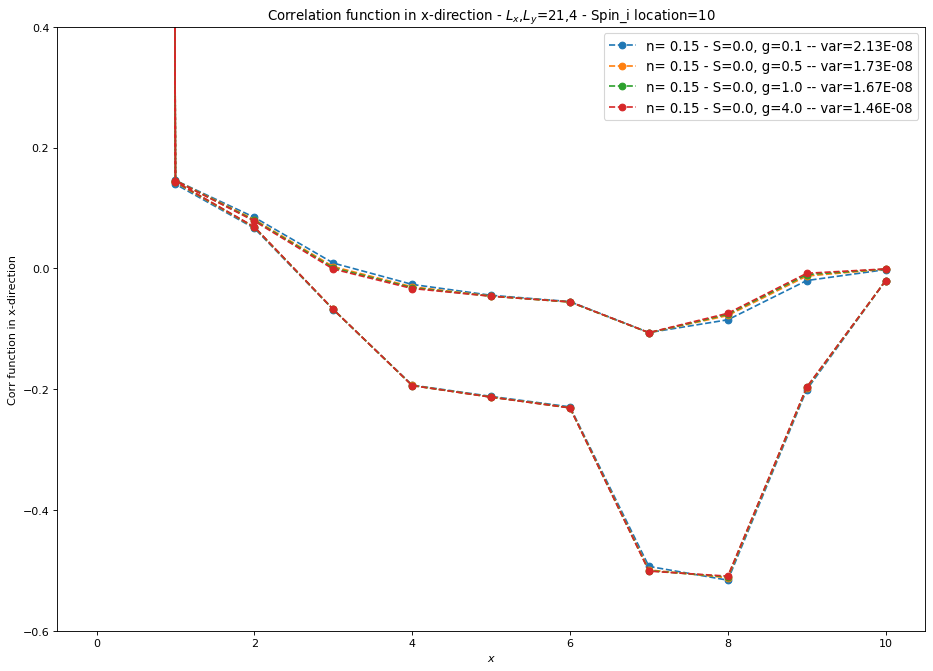

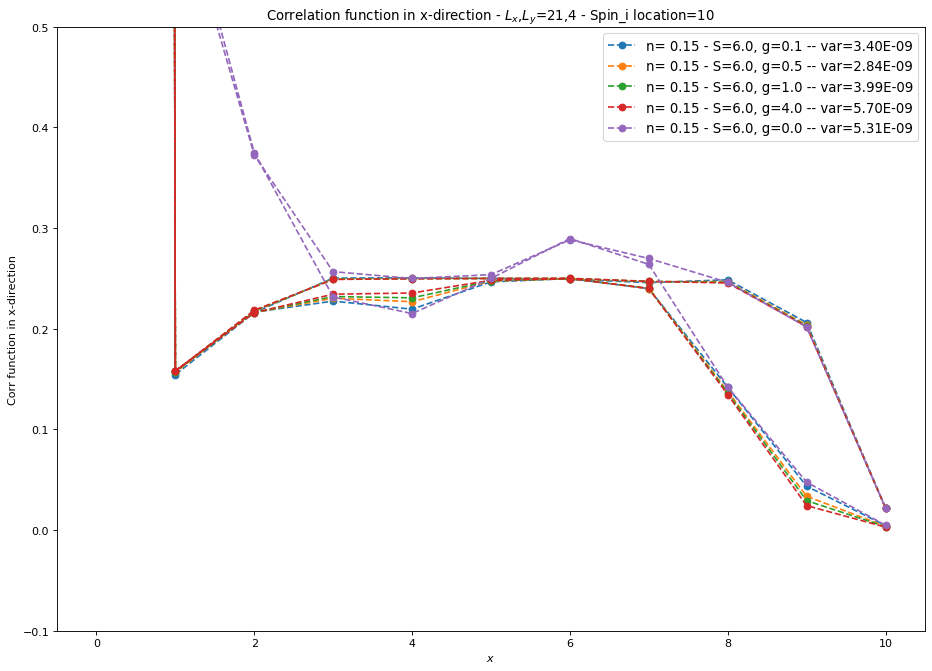

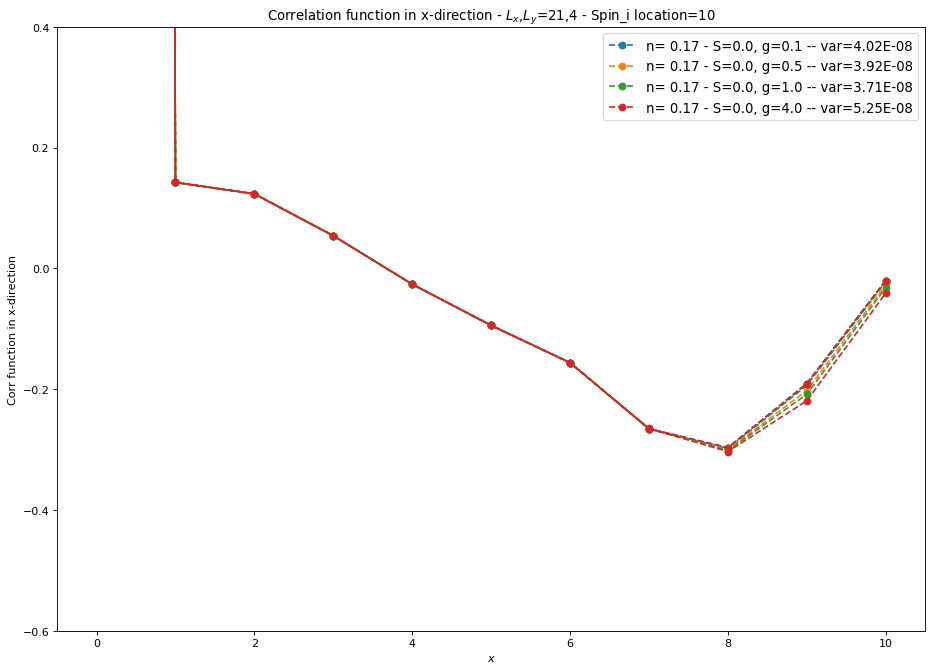

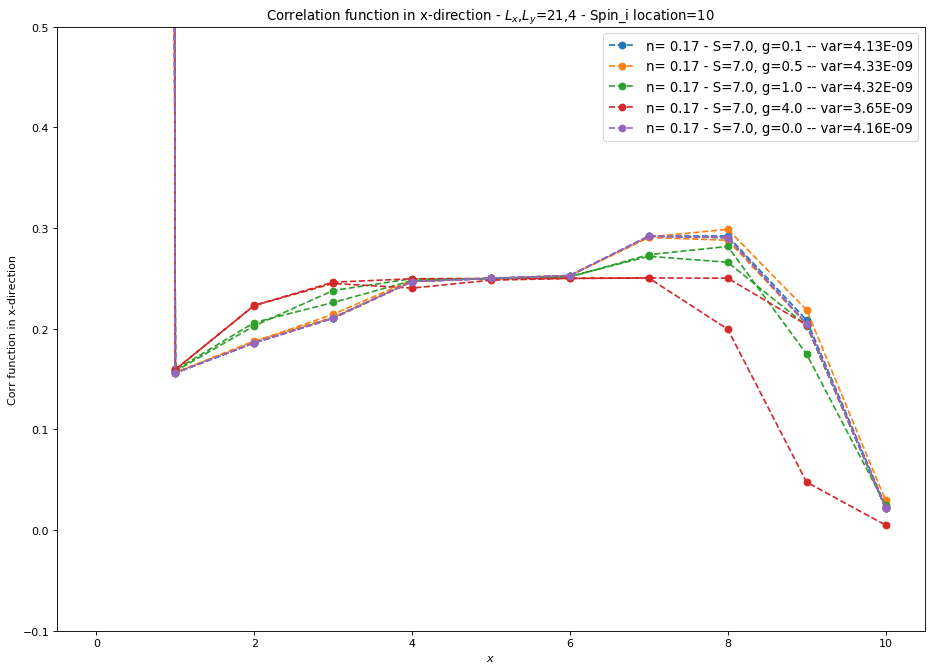

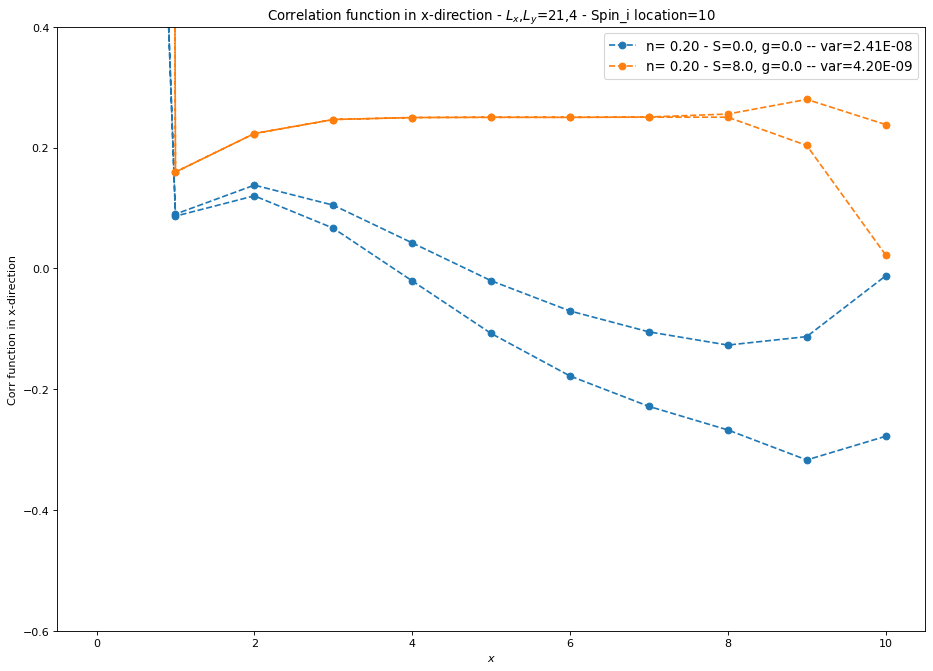

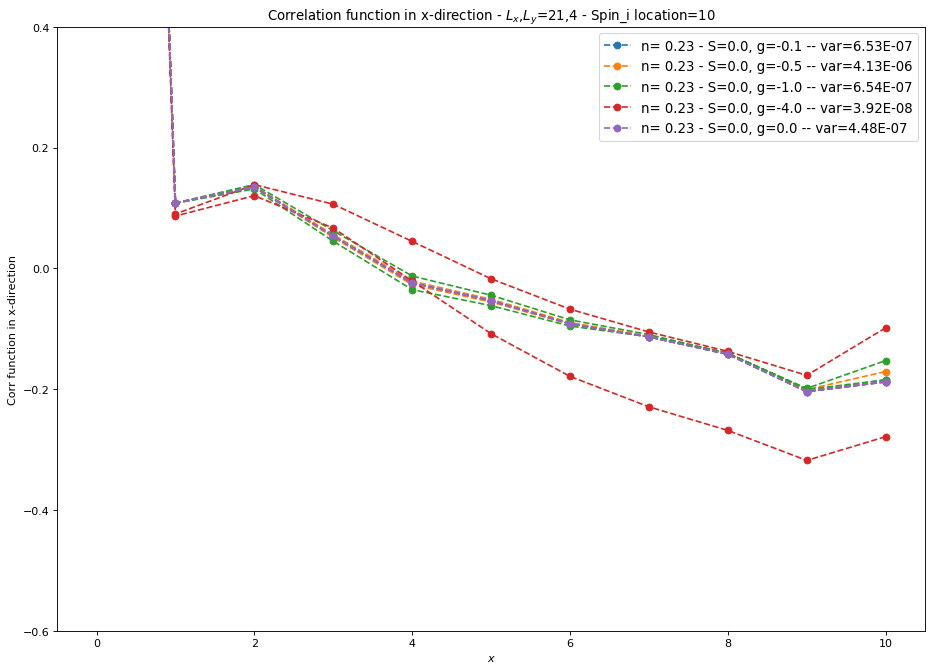

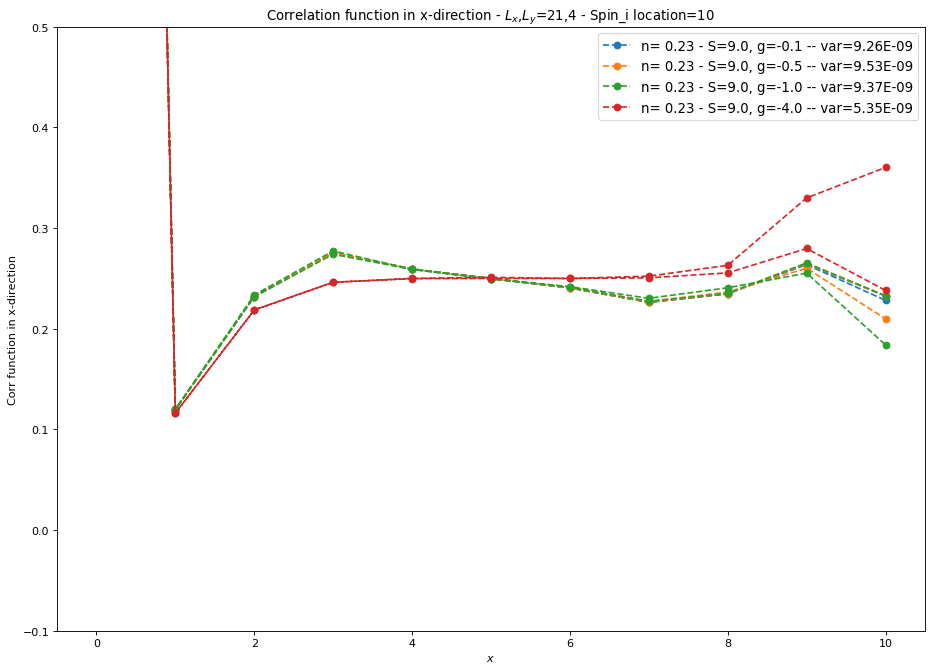

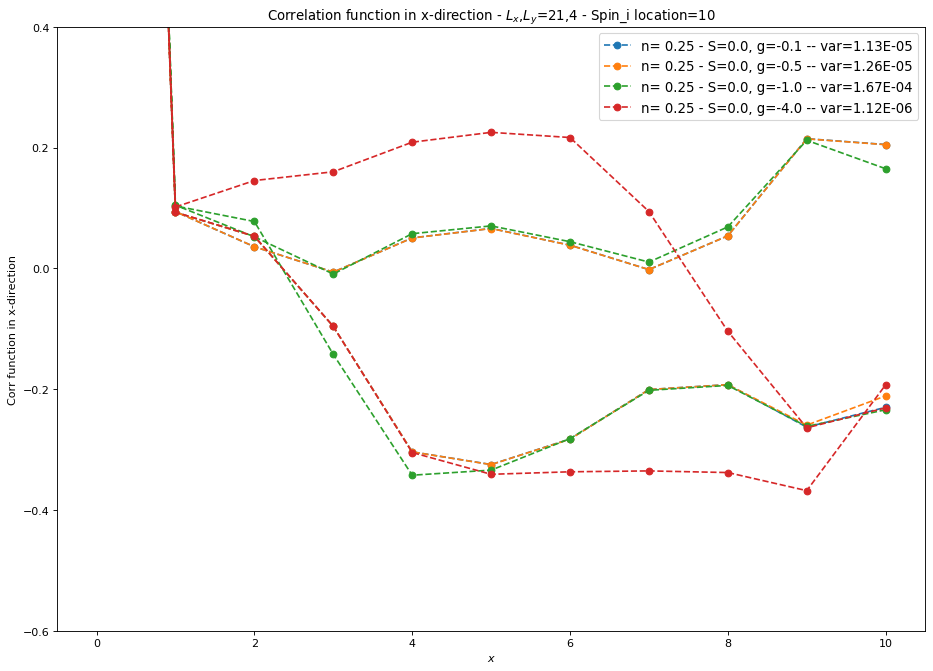

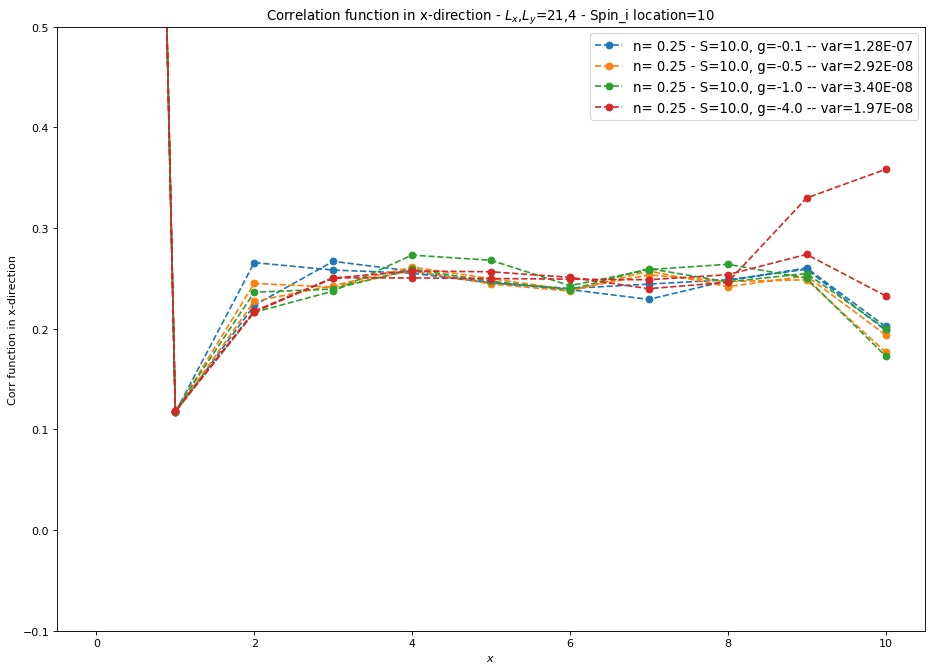

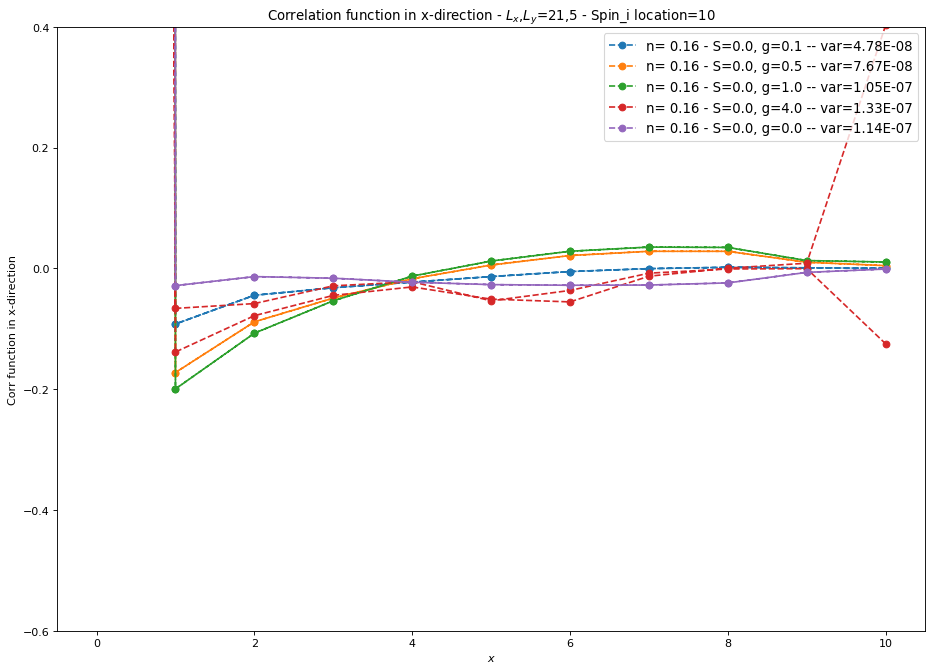

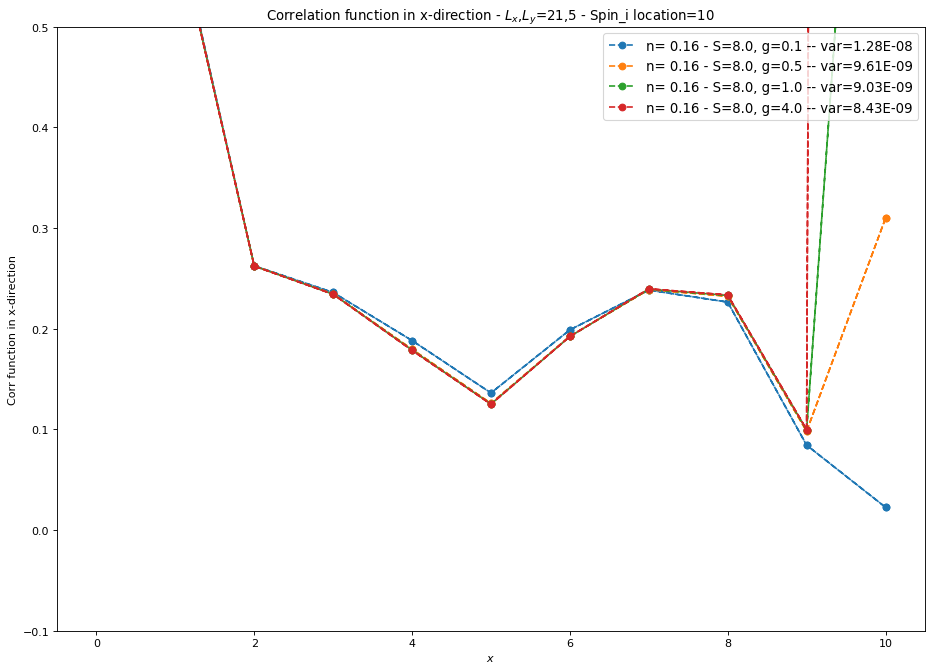

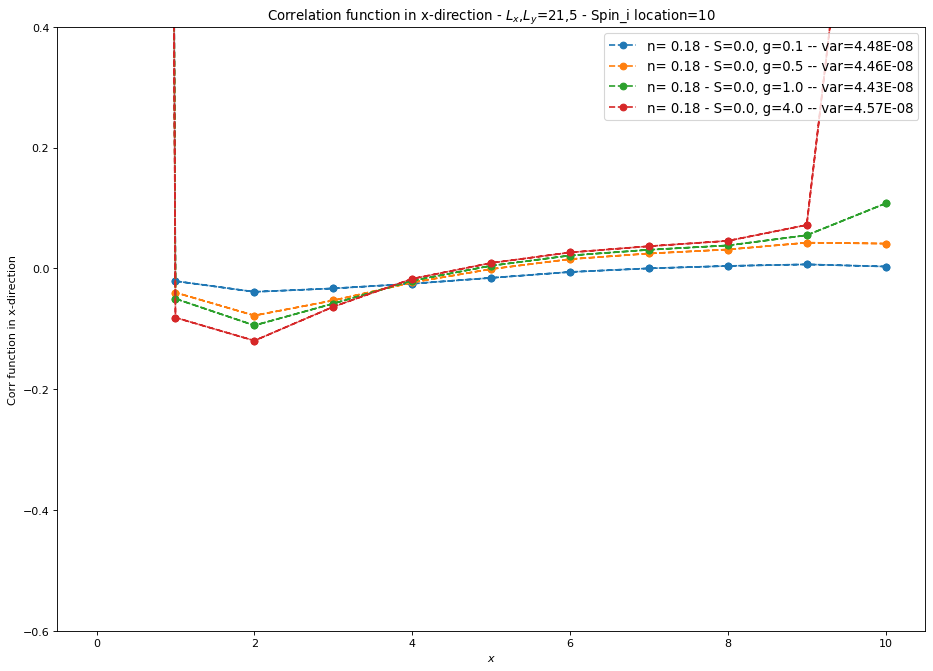

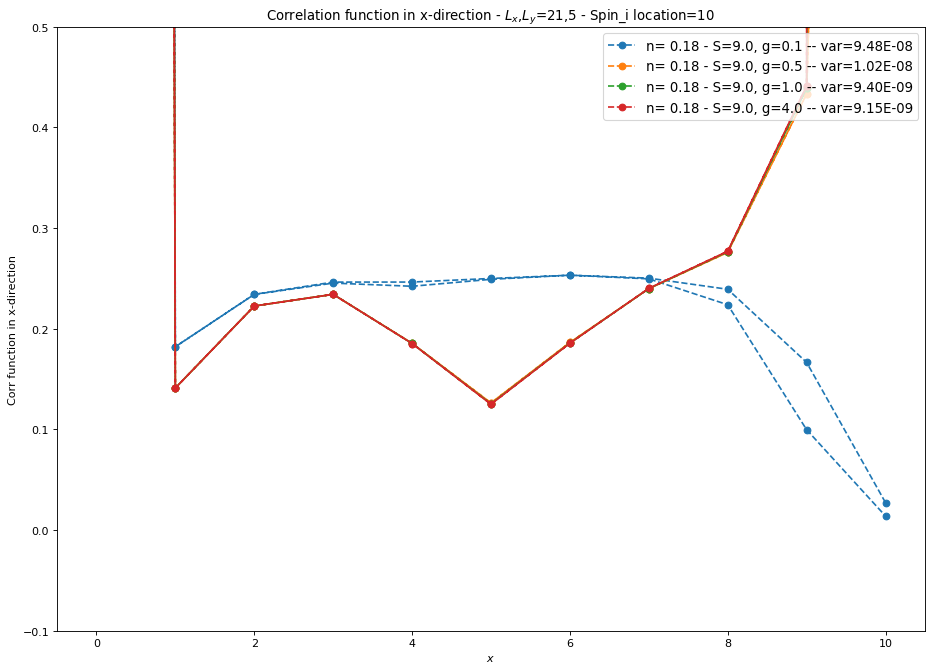

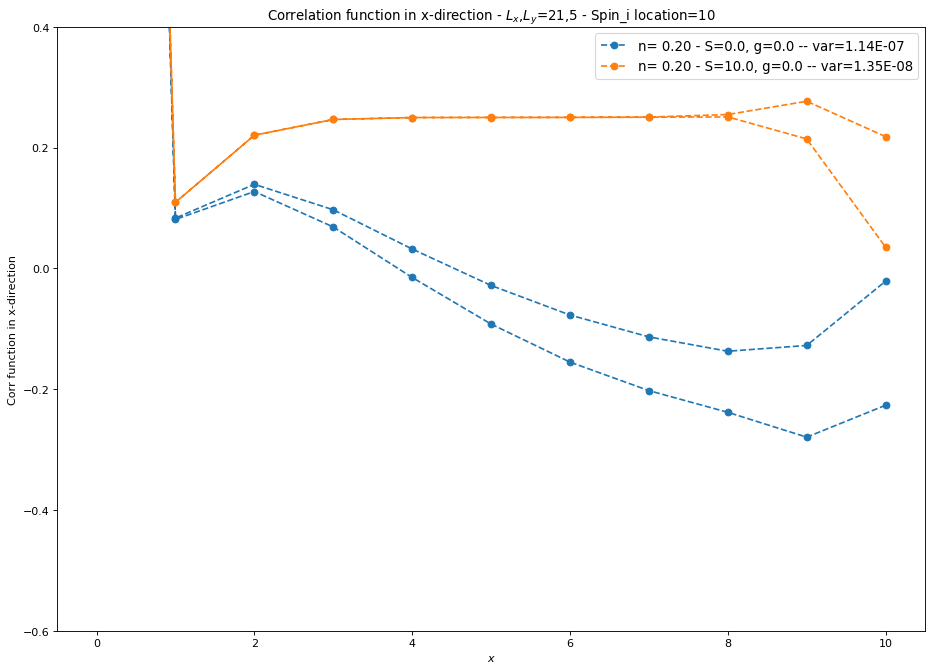

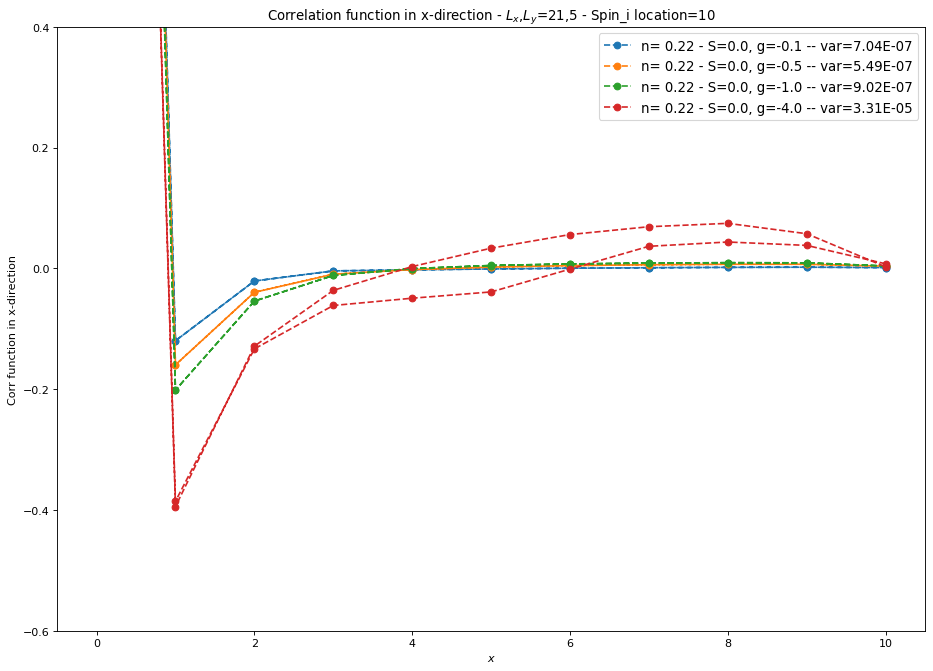

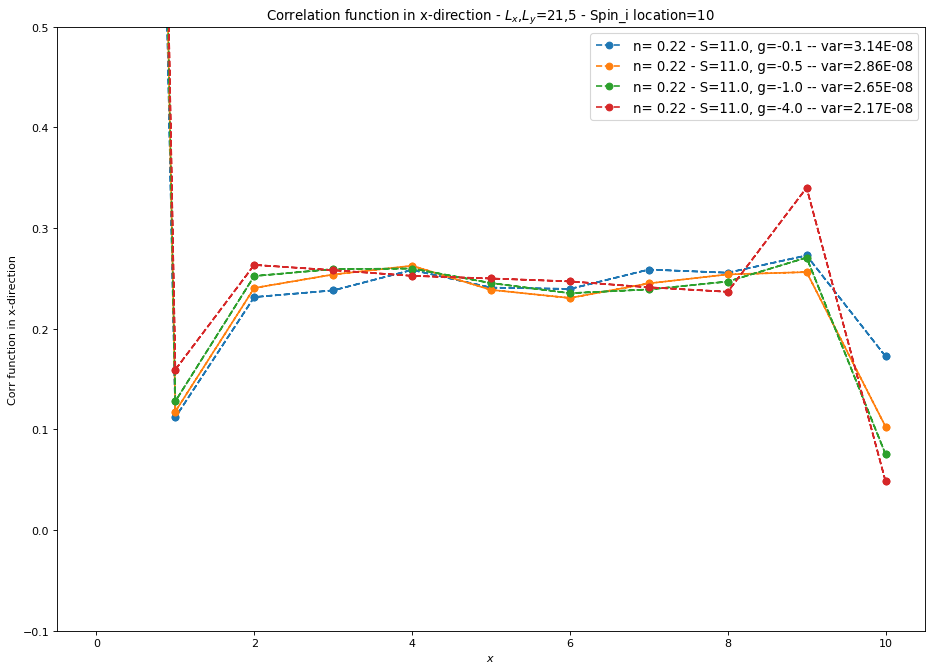

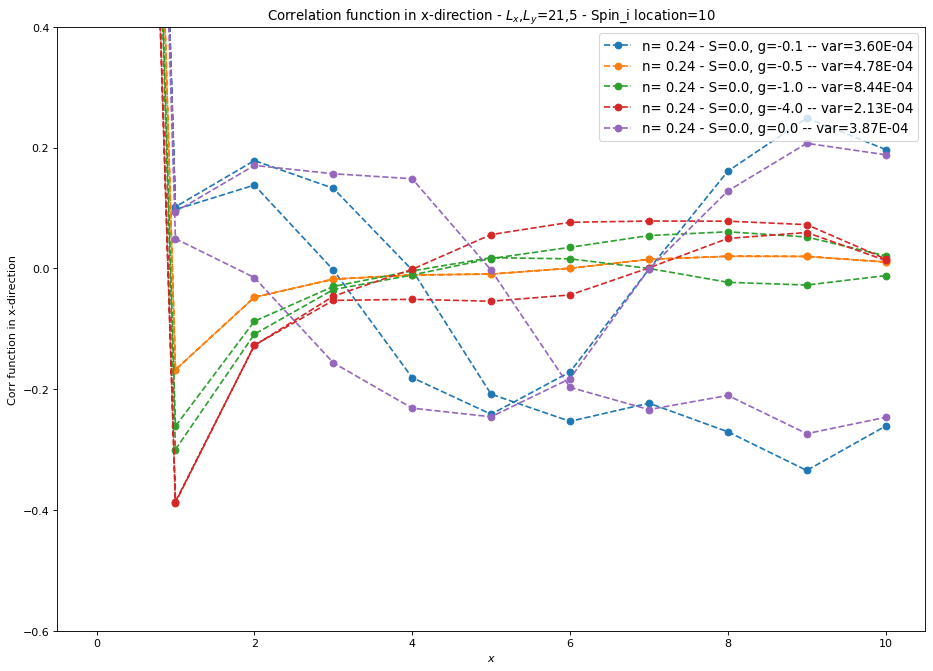

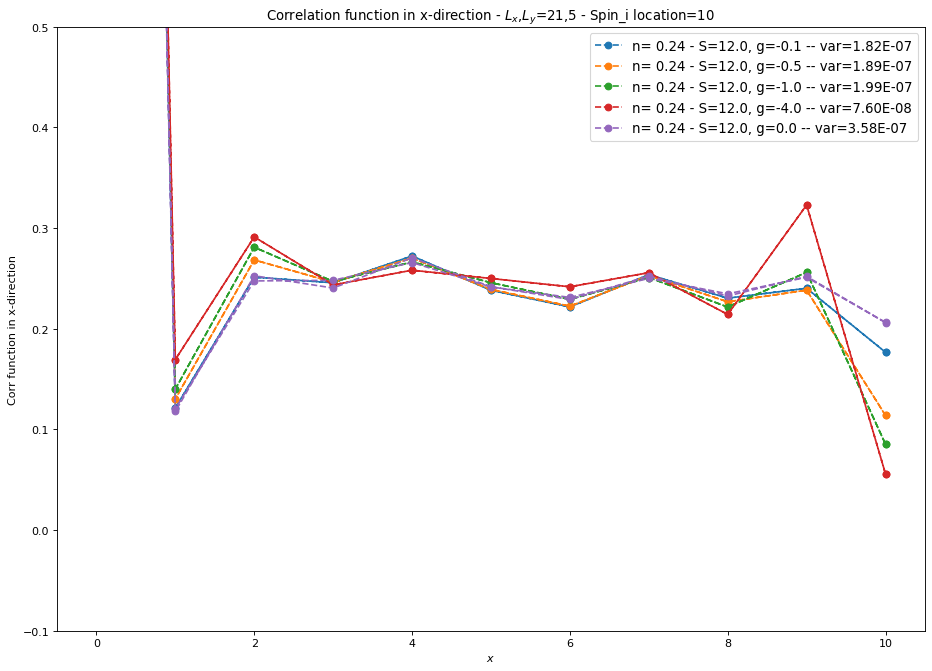

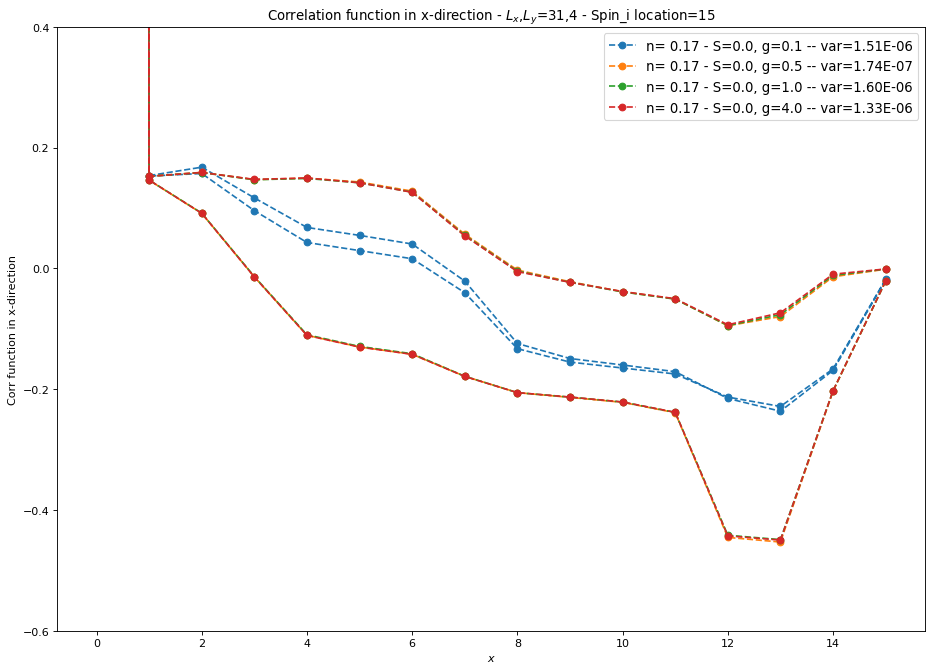

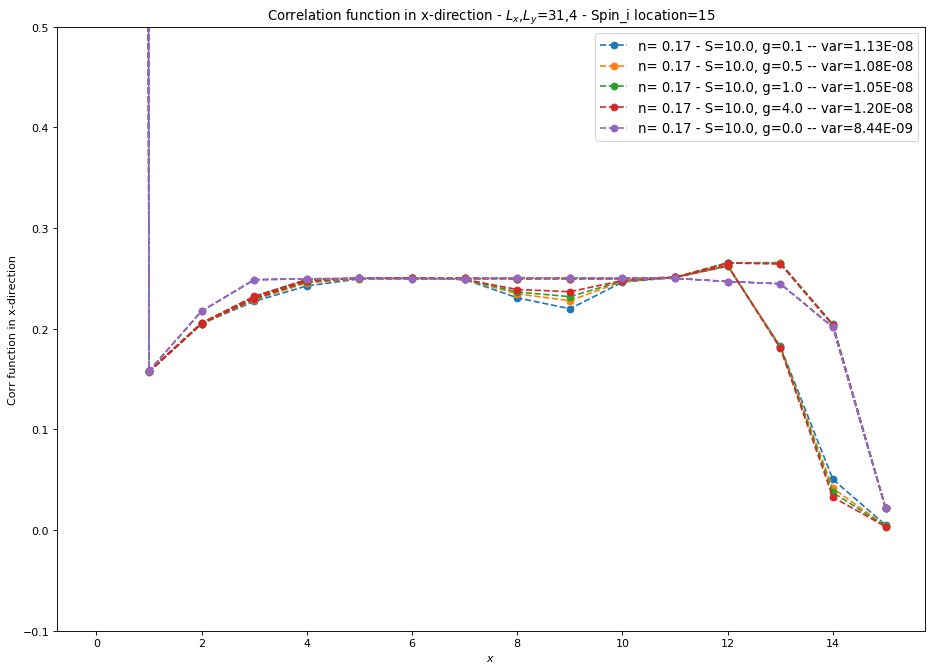

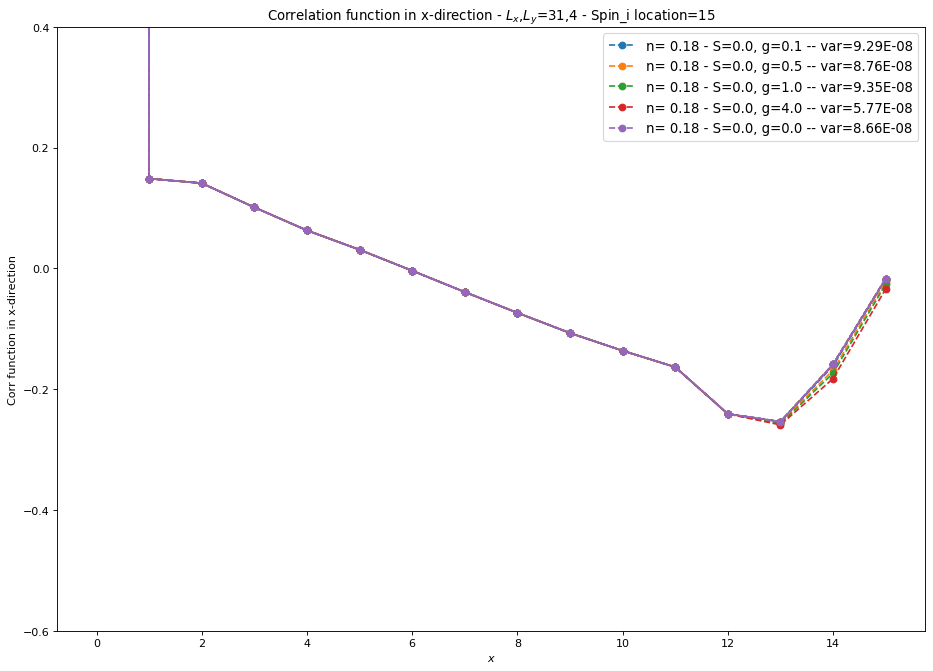

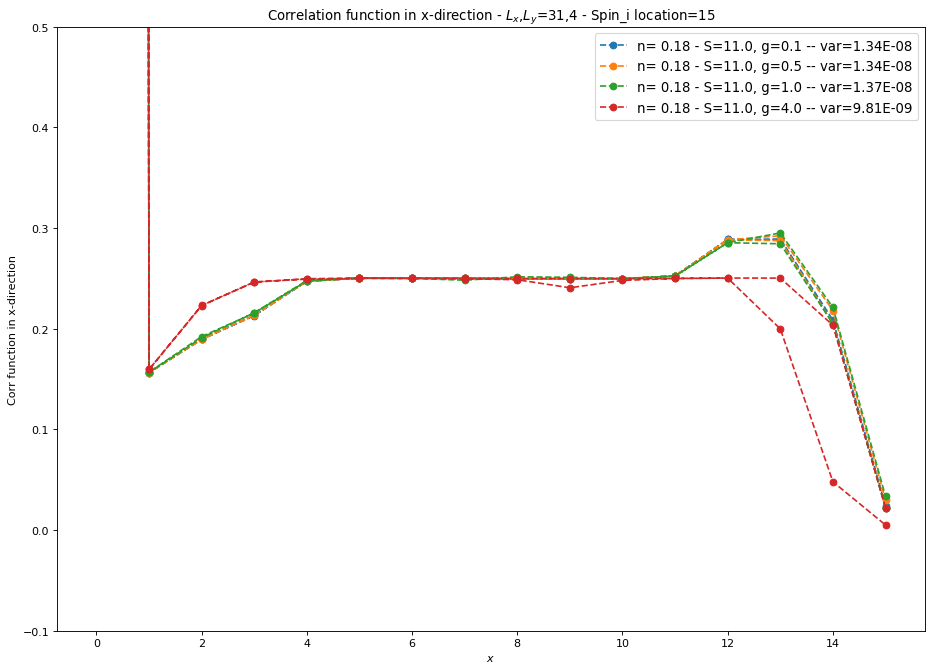

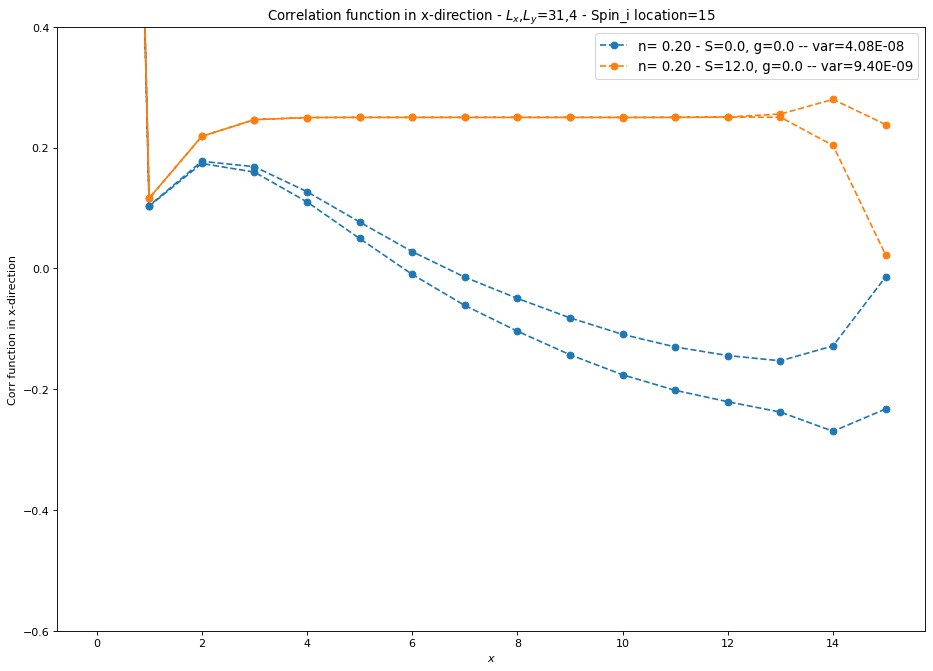

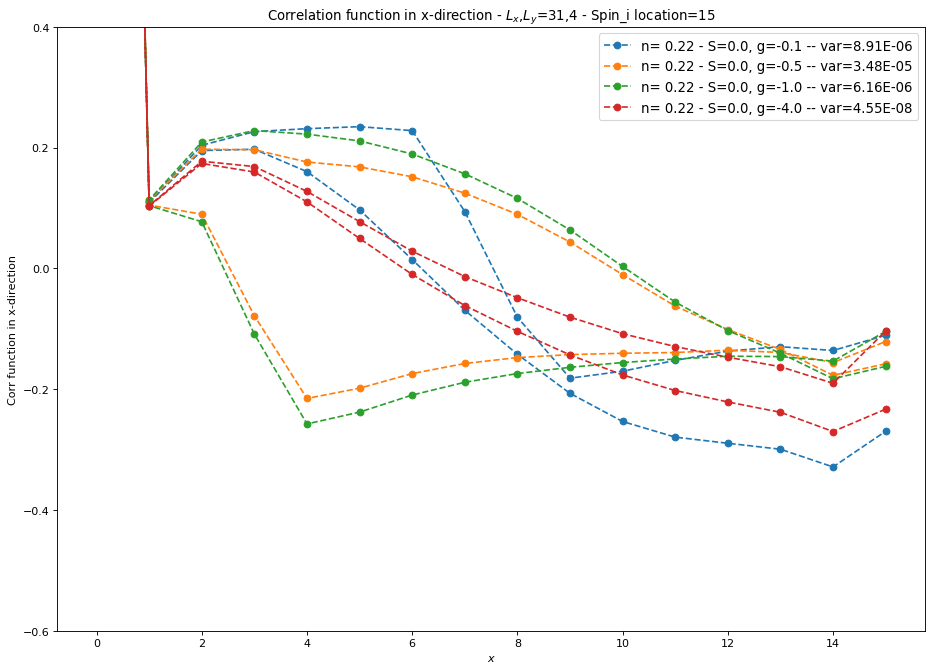

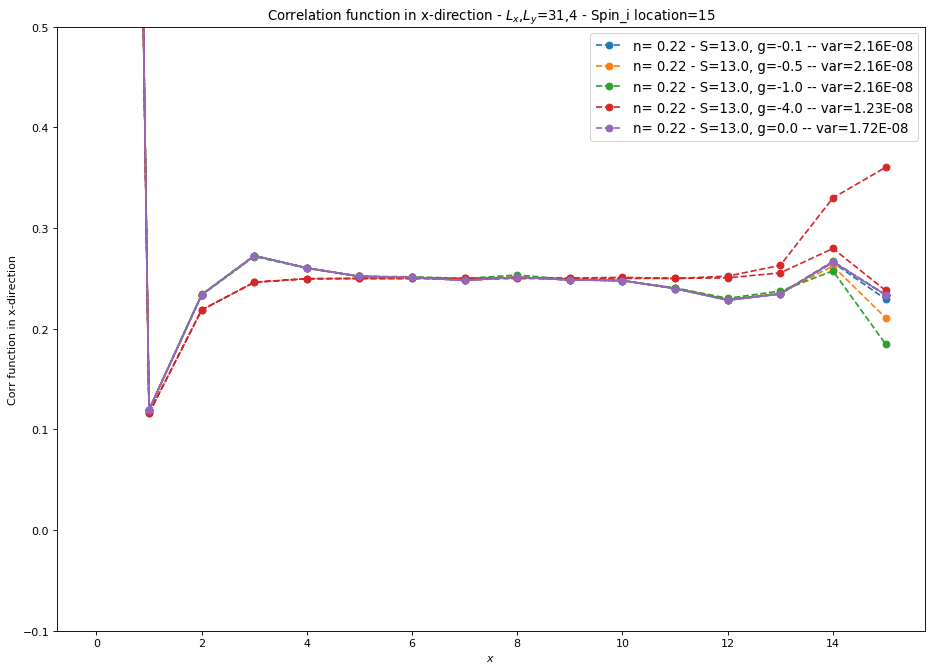

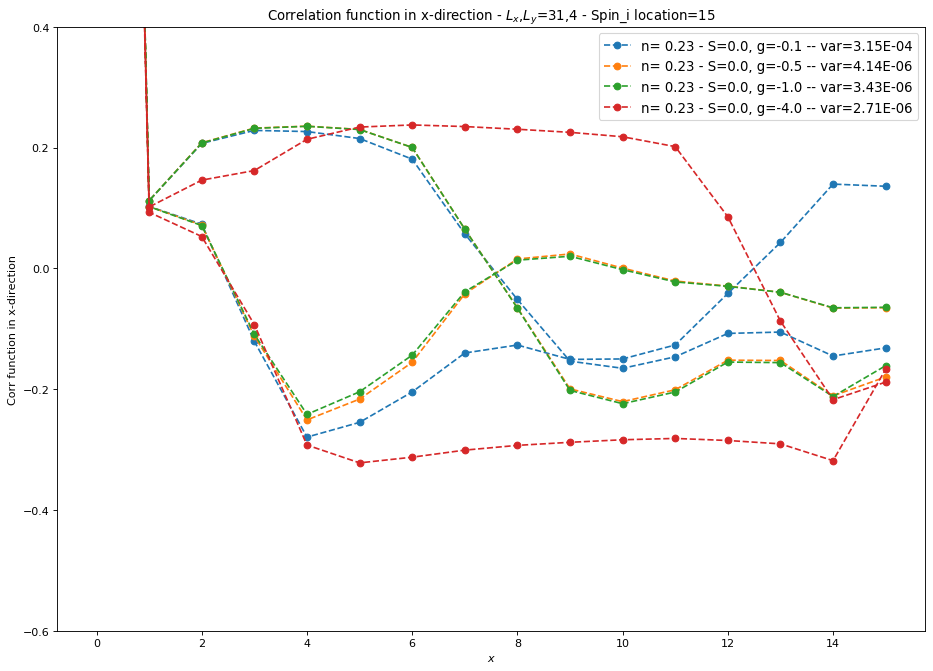

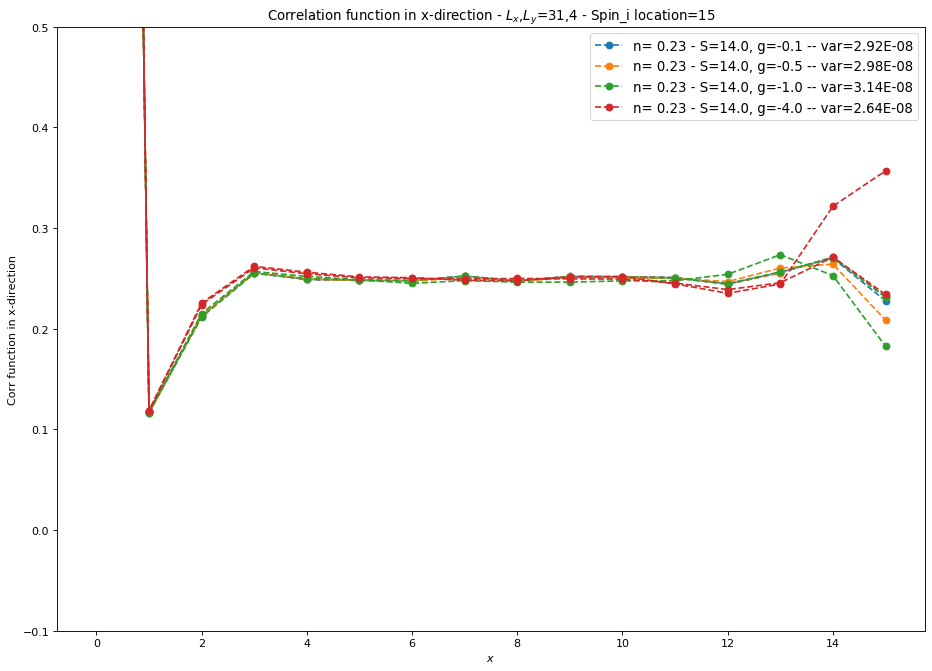

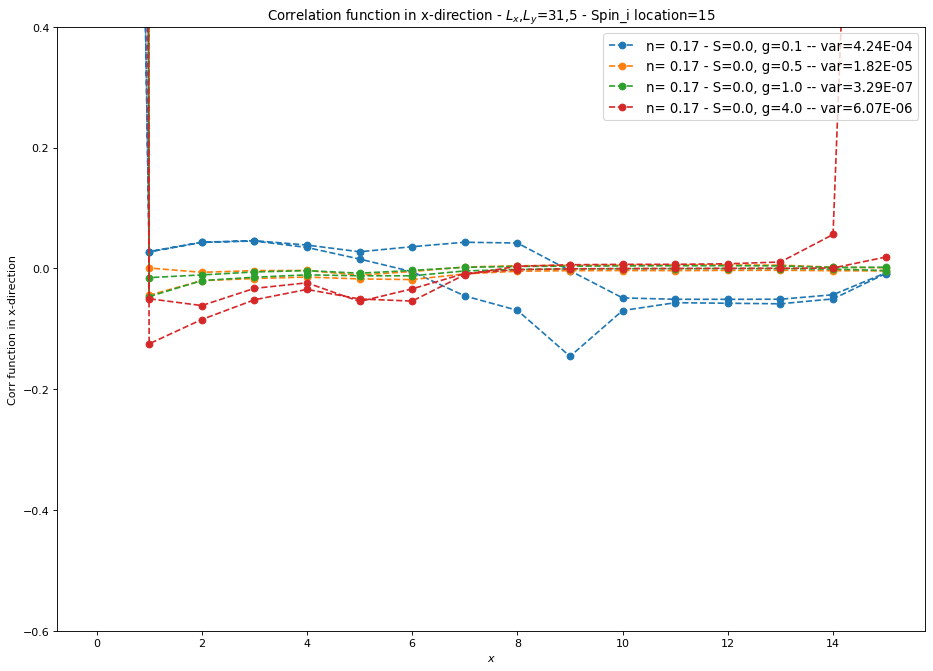

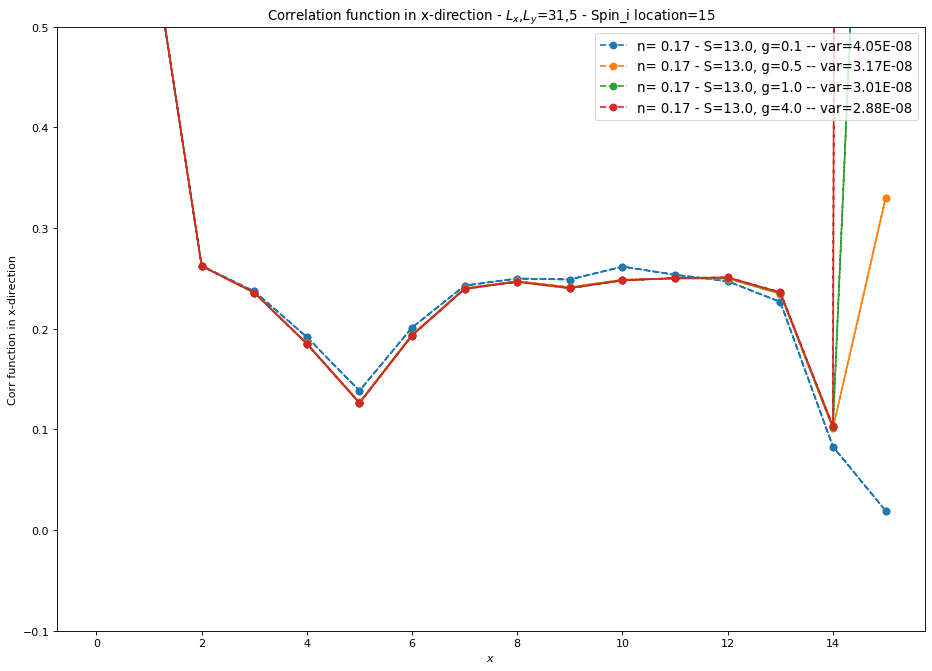

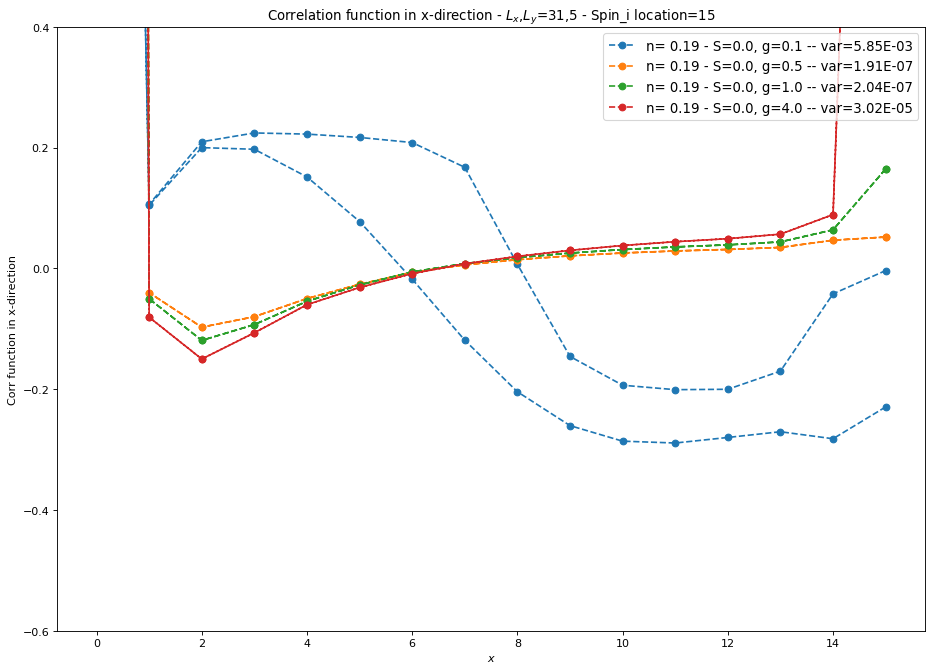

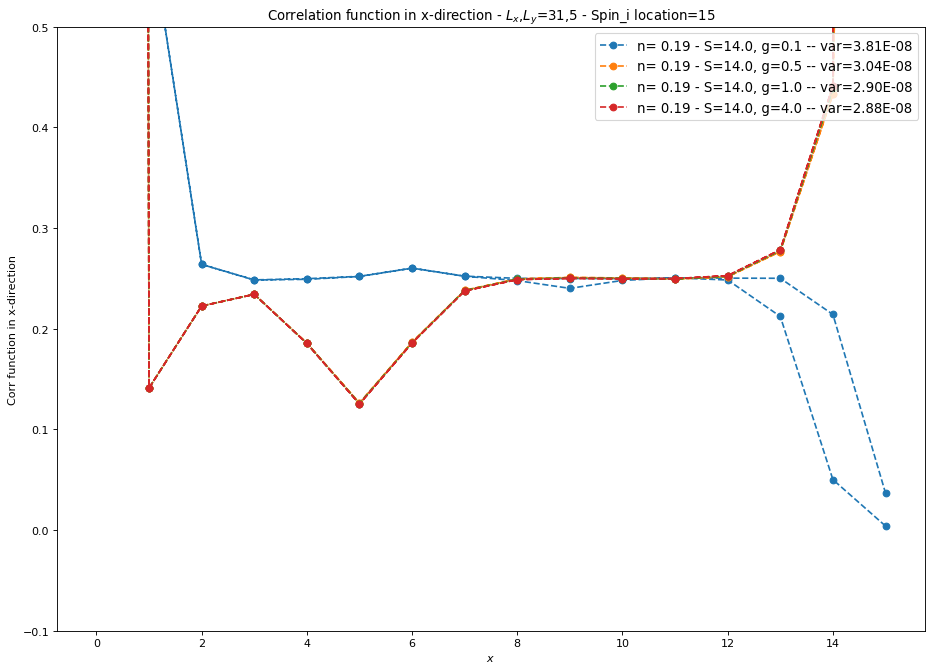

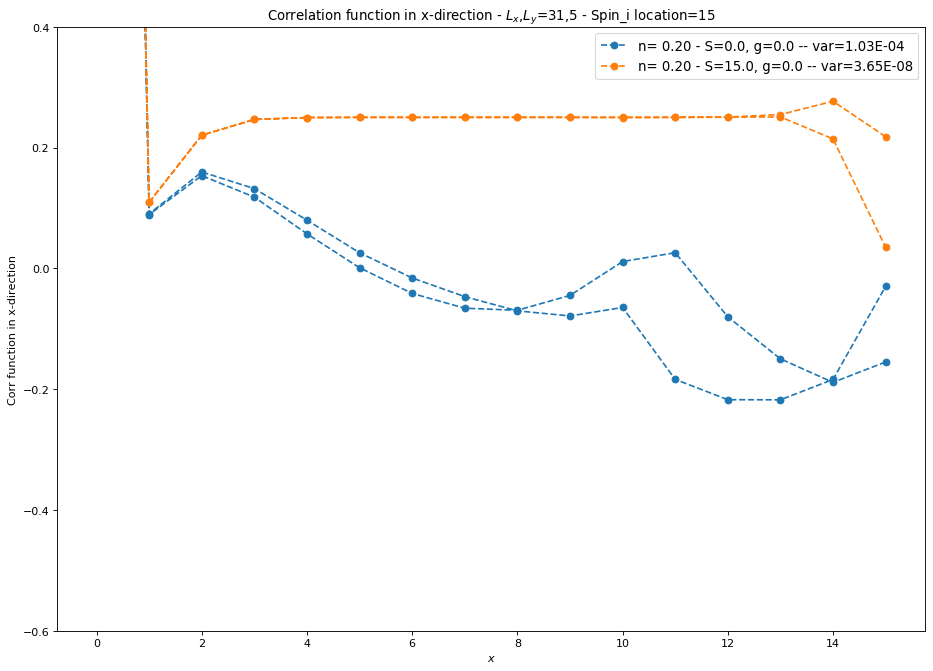

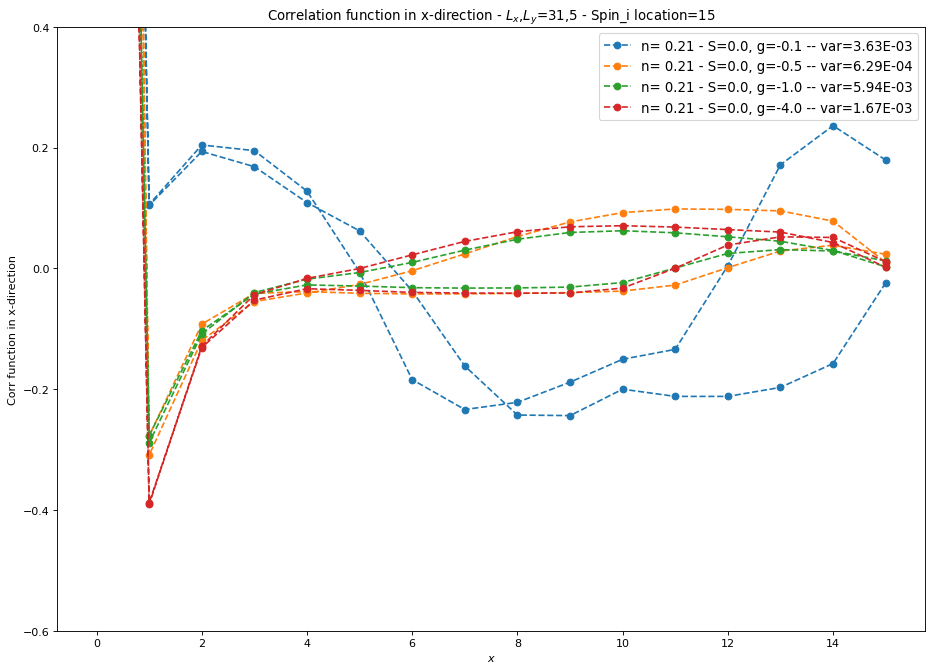

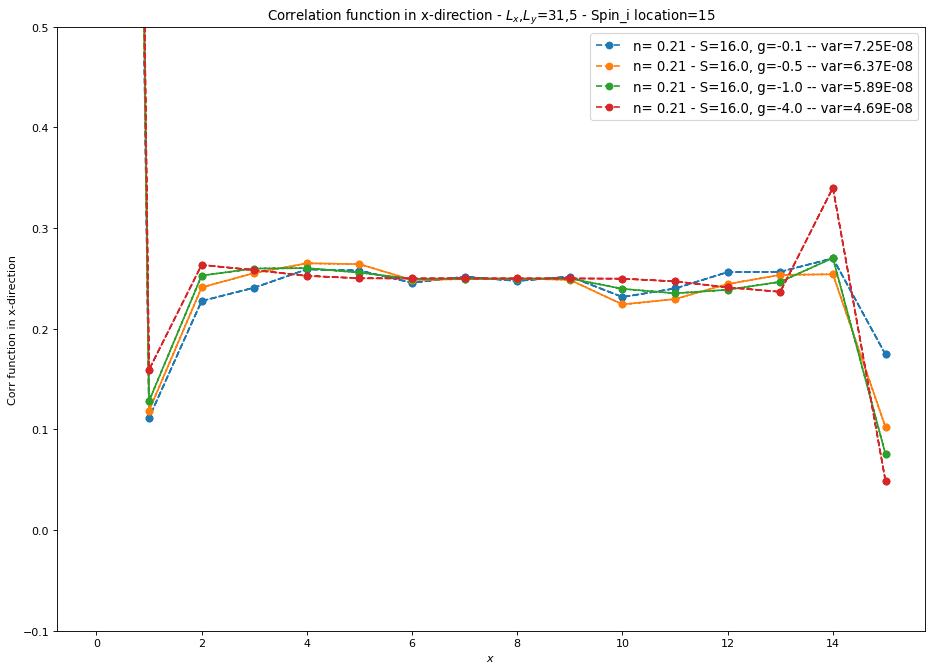

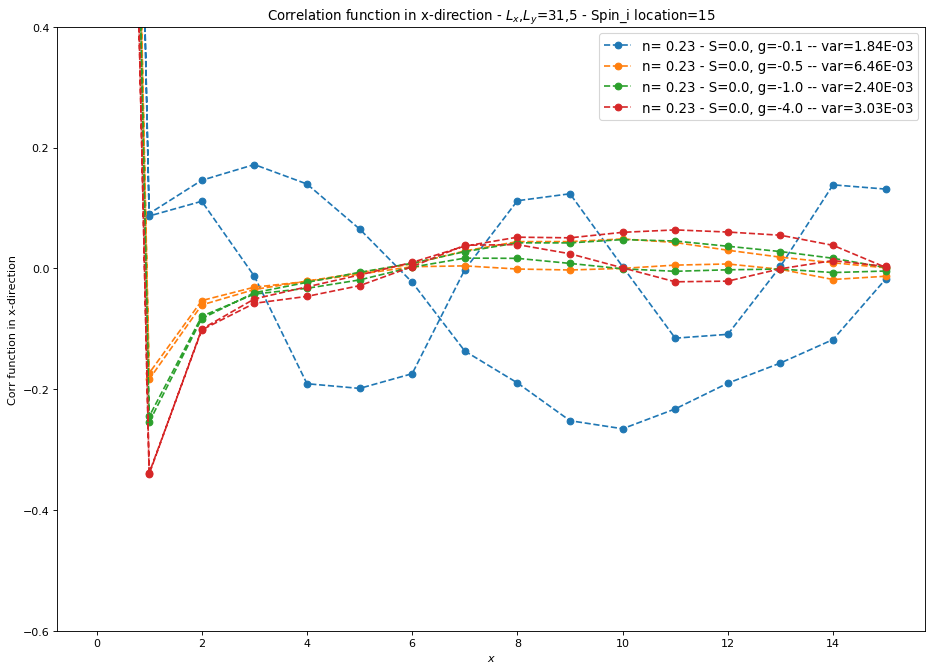

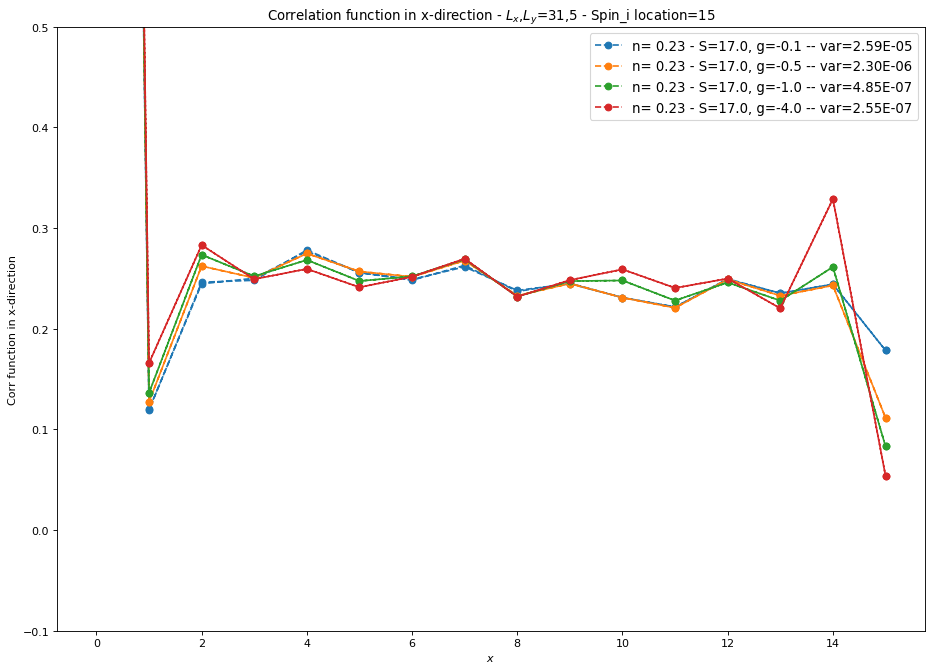

In [25]:
par = p
g_arr = np.array([0.1, -0.1, 0.5, -0.5, 1.0, -1.0, 4.0, -4.0, 0.])
N_arr = np.arange(int(par.Nphi//2*2)-2, int(par.Nphi//2*2)-0, 2)
tar_loc_n="../codes/data/dat-files-03-expc-arr/n-arr/"
tar_loc_corr="../codes/data/dat-files-03-expc-arr/corr-func-arr/"
s_arrays = [np.array([0]), np.array([1])]
y_0=0
y_lim_up=0.9; y_lim_down=-0.9

pre_str = "DMRG_pin_corr_01"
Lx_arr = [21,31]
Ly_arr = [4,5]
for Lx in Lx_arr:
    for Ly in Ly_arr:
        idx = 0
        par.Lx=Lx; par.Ly=Ly;par.Nphi=(par.Lx-1)*par.Ly*0.2;
        filling_arrs = [np.arange(int(par.Nphi//2*2)-4, int(par.Nphi//2*2)-2, 2),
                        np.arange(int(par.Nphi//2*2)-2, int(par.Nphi//2*2)-0, 2),
             np.arange(int(par.Nphi//2*2)+0, int(par.Nphi//2*2)+2, 2),
             np.arange(int(par.Nphi//2*2)+2, int(par.Nphi//2*2)+4, 2),
             np.arange(int(par.Nphi//2*2)+4, int(par.Nphi//2*2)+6, 2), 
             np.arange(int(par.Nphi//2*2)+6, int(par.Nphi//2*2)+8, 2)]
        for n_arr in filling_arrs[:-1]:
            for s_arr in s_arrays:
                idx += 1
                y_lim_up=0.4; y_lim_down=-0.6
                
                if idx == 5:
                    s_arr = np.array([0,1])
                if idx == 6 and s_arr==1:
                    idx += -1
                    continue
                
                vs = str(idx).zfill(2)
                if s_arr[0] == 1:
                    y_lim_up=0.5; y_lim_down=-0.1

                do_plot_correlation_spin(par, n_arr, g_arr, s_arr, tar_loc_n,  tar_loc_corr, 
                                         y_0, y_lim_up, y_lim_down, "upper right", pre_str, vs)


DMRG Table for Lx26_Ly4_Nphi20.0_U8.0_N16_S0.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0258890651 |              100 |      -46.5076391327 | -46.5076391327 |       283.0443336964 |
| 0.0263131978 |              100 |       -0.0000743178 | -46.5077134504 |       231.8902263641 |
| 0.0160035734 |              200 |       -0.4288119731 | -46.9365254236 |       607.4549694061 |
| 0.0152364432 |              200 |       -0.0001348442 | -46.9366602678 |       505.1293087006 |
| 0.0040117648 |              400 |       -0.0116165370 | -46.9482768048 |      1630.1703960896 |
| 0.0045922430 |              400 |       -0.0000660246 | -46.9483428294 |      1782.3635022640 |
| 0.0046751836 |              400 |       -0.0000046984 | -46.9483475278 |      1820.0468394756 |
| 0.001940

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0057629693 |              100 |      -46.9881920993 | -46.9881920993 |       314.0813717842 |
| 0.0057485293 |              100 |       -0.0000032206 | -46.9881953200 |       306.1303911209 |
| 0.0023618822 |              100 |      -46.9906238576 | -46.9906238576 |       274.1061172485 |
| 0.0023154333 |              100 |       -0.0000033013 | -46.9906271589 |       336.4529993534 |
| 0.0004629393 |              200 |       -0.0003590049 | -46.9909861638 |       804.6455490589 |
| 0.0004629565 |              200 |       -0.0000001309 | -46.9909862947 |       829.6129279137 |
| 0.0001116232 |              400 |       -0.0000564974 | -46.9910427921 |      1956.4158987999 |
| 0.0000958343 |              400 |       -0.0000018343 | -46.9910446264 |      2484.3081481457 |
| 0.0000914637 |    

DMRG Table for Lx26_Ly4_Nphi20.0_U8.0_N20_S0.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx26_Ly4_Nphi20.0_U8.0_N20_S10.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx26_Ly4_Nphi20.0_U8.0_N20_S0.0_g-0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx26_Ly4_Nphi20.0_U8.0_N20_S10.0_g-0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx26_Ly4_Nphi20.0_U8.0_N20_S0.0_g0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx26_Ly4_Nphi20.0_U8.0_N20_S10.0_g0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx26_Ly4_Nphi20.0_U8.0_N20_S0.0_g-0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx26_Ly4_Nphi20.0_U8.0_N20_S10.0_g-0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx26_Ly4_Nphi20.0_U8.0_N20_S0.0_g1.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx26_

DMRG Table for Lx26_Ly4_Nphi20.0_U8.0_N22_S11.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx26_Ly4_Nphi20.0_U8.0_N22_S11.0_g-0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0186829045 |              100 |      -62.2426631619 | -62.2426631619 |       395.5695388317 |
| 0.0186792728 |              100 |       -0.0000005380 | -62.2426636999 |       217.2922303677 |
| 0.0002850350 |              200 |       -0.0030683827 | -62.2457320826 |       558.6548161507 |
| 0.0002846096 |              200 |       -0.0000000535 | -62.2457321361 |       973.0832142830 |
| 0.0000339639 |              400 |       -0.0000308232 | -62.2457629593 |      2198.7132399082 |
| 0.0000095888 |              400 |       -0.0000030445 | -62.2457660038 |      2910.6102590561

DMRG Table for Lx26_Ly4_Nphi20.0_U8.0_N24_S12.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx26_Ly4_Nphi20.0_U8.0_N24_S12.0_g-0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0040692360 |              100 |      -64.8158407111 | -64.8158407111 |       275.2879641056 |
| 0.0040440978 |              100 |       -0.0000081023 | -64.8158488134 |       448.5288307667 |
| 0.0011832514 |              200 |       -0.0004999125 | -64.8163487259 |      1018.8671796322 |
| 0.0011791028 |              200 |       -0.0000004936 | -64.8163492195 |      1186.4708101749 |
| 0.0002495408 |              400 |       -0.0001464058 | -64.8164956253 |      2623.9662950039 |
| 0.0001825701 |              400 |       -0.0000082517 | -64.8165038770 |      2445.1523604393

DMRG Table for Lx36_Ly4_Nphi28.0_U8.0_N24_S12.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0045734328 |              100 |      -70.4767704396 | -70.4767704396 |       774.3193094730 |
| 0.0046096683 |              100 |       -0.0000011923 | -70.4767716319 |       668.0725741386 |
| 0.0034076238 |              200 |       -0.0003419382 | -70.4771135700 |      1064.2787184715 |
| 0.0017316890 |              200 |       -0.0003230061 | -70.4774365761 |      1466.7234535217 |
| 0.0009678090 |              400 |       -0.0003619087 | -70.4777984848 |      2061.9429755211 |
| 0.0000835034 |              400 |       -0.0002556184 | -70.4780541032 |      3123.2666440010 |
| 0.0000443304 |              400 |       -0.0000071633 | -70.4780612664 |      3497.2982187271 |
| 0.00002

DMRG Table for Lx36_Ly4_Nphi28.0_U8.0_N26_S0.0_g0.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.5111724139 |              100 |      -73.8080919410 | -73.8080919410 |       969.3002941608 |
| 0.5041355854 |              100 |       -0.0354843959 | -73.8435763369 |       943.8431360722 |
| 0.1248527918 |              200 |       -1.3101553610 | -75.1537316979 |      2248.8672702312 |
| 0.1213730976 |              200 |       -0.1113896649 | -75.2651213628 |      1932.3505737782 |
| 0.0363119729 |              400 |       -0.5642421637 | -75.8293635265 |      6849.6506690979 |
| 0.0358010054 |              400 |       -0.0139582409 | -75.8433217674 |      6256.0964598656 |
| 0.0351399947 |              400 |       -0.0002195453 | -75.8435413128 |      6170.0045661926 |
| 0.002549

DMRG Table for Lx36_Ly4_Nphi28.0_U8.0_N28_S0.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx36_Ly4_Nphi28.0_U8.0_N28_S14.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx36_Ly4_Nphi28.0_U8.0_N28_S0.0_g-0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx36_Ly4_Nphi28.0_U8.0_N28_S14.0_g-0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx36_Ly4_Nphi28.0_U8.0_N28_S0.0_g0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx36_Ly4_Nphi28.0_U8.0_N28_S14.0_g0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx36_Ly4_Nphi28.0_U8.0_N28_S0.0_g-0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx36_Ly4_Nphi28.0_U8.0_N28_S14.0_g-0.5 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx36_Ly4_Nphi28.0_U8.0_N28_S0.0_g1.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx36_

DMRG Table for Lx36_Ly4_Nphi28.0_U8.0_N30_S15.0_g0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

DMRG Table for Lx36_Ly4_Nphi28.0_U8.0_N30_S15.0_g-0.1 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.0076452300 |              100 |      -85.7319109653 | -85.7319109653 |       888.6360371113 |
| 0.0076401835 |              100 |       -0.0000007860 | -85.7319117513 |      1013.1987054348 |
| 0.0005632346 |              200 |       -0.0011399110 | -85.7330516623 |      1728.5148324966 |
| 0.0005559844 |              200 |       -0.0000011262 | -85.7330527885 |      1926.8052687645 |
| 0.0000219869 |              400 |       -0.0000678507 | -85.7331206391 |      2951.3702936172 |
| 0.0000072837 |              400 |       -0.0000016535 | -85.7331222926 |      3592.4975399971

DMRG Table for Lx36_Ly4_Nphi28.0_U8.0_N32_S0.0_g0.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.4207882455 |              100 |      -89.2700640963 | -89.2700640963 |      1036.8967838287 |
| 0.3763245279 |              100 |       -0.0104015896 | -89.2804656859 |       862.6645464897 |
| 0.1908119095 |              200 |       -1.2123641816 | -90.4928298675 |      2059.0608677864 |
| 0.1911725650 |              200 |       -0.0003697122 | -90.4931995797 |      1755.5732340813 |
| 0.2135139273 |              400 |       -0.3098523261 | -90.8030519057 |      7199.2116162777 |
| 0.2081188505 |              400 |       -0.0011345636 | -90.8041864694 |      6359.2053134441 |
| 0.2082306529 |              400 |       -0.0000014428 | -90.8041879122 |      6289.0500154495 |
| 0.010148

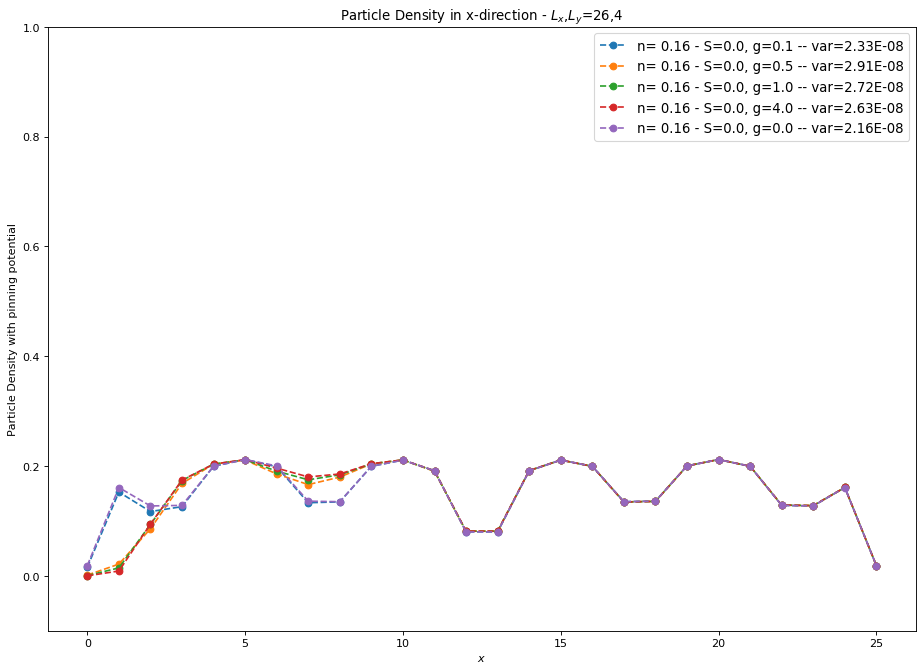

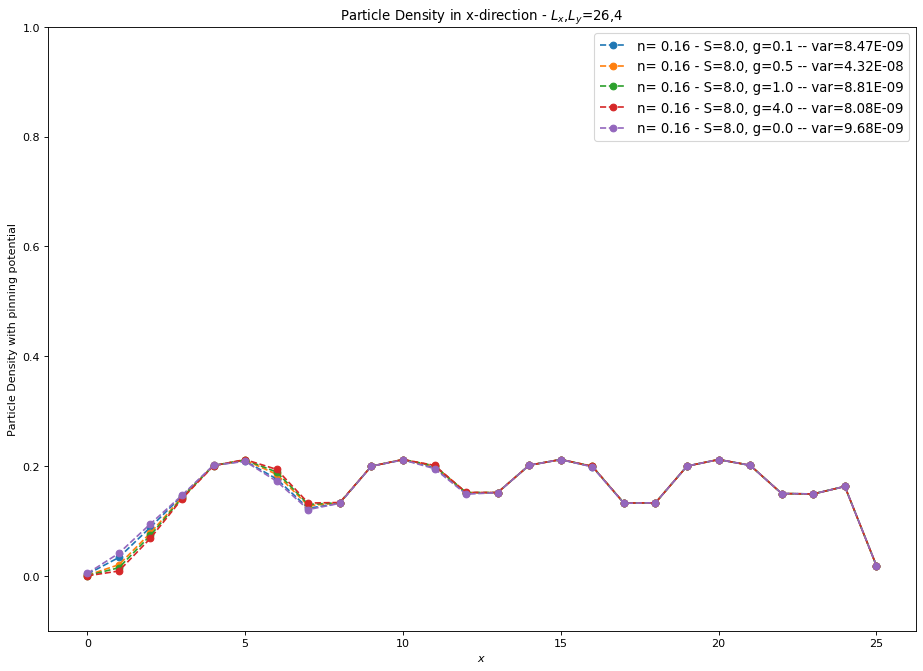

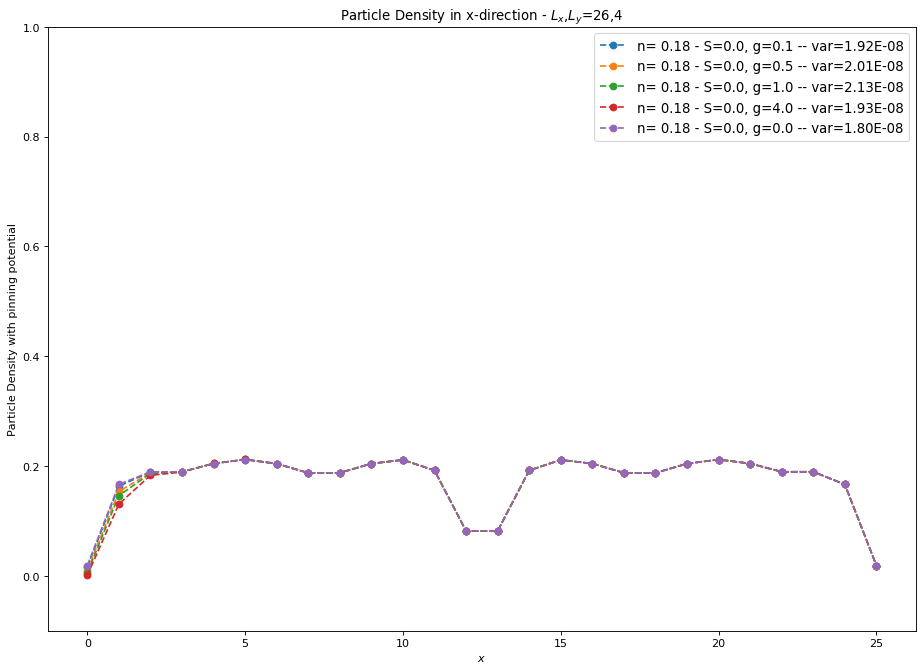

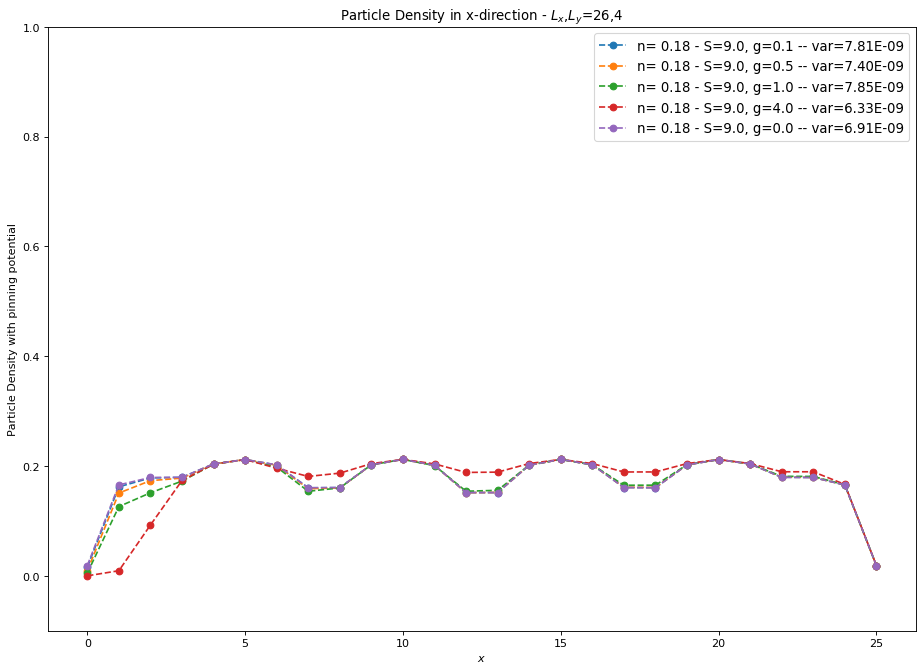

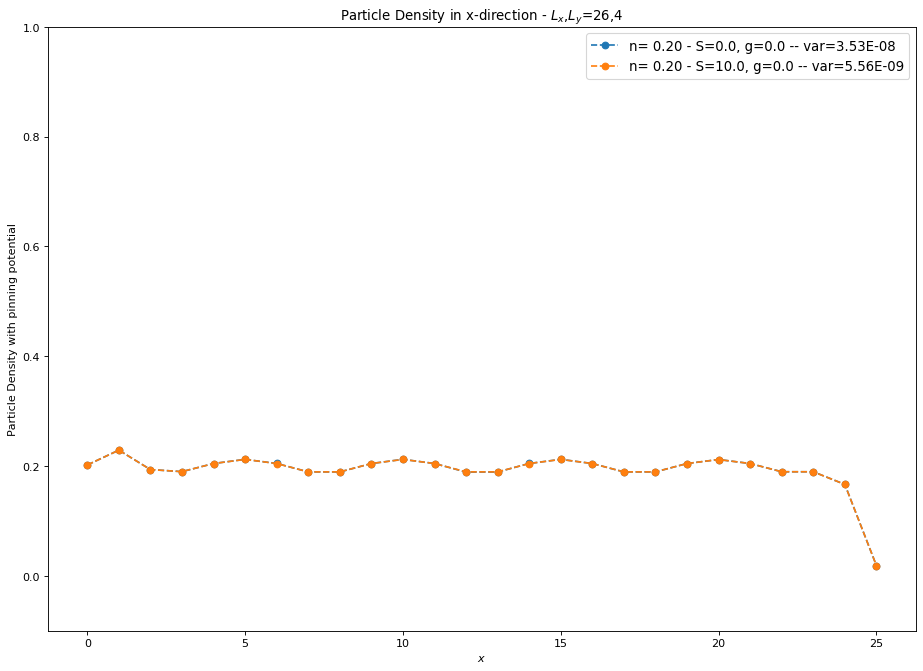

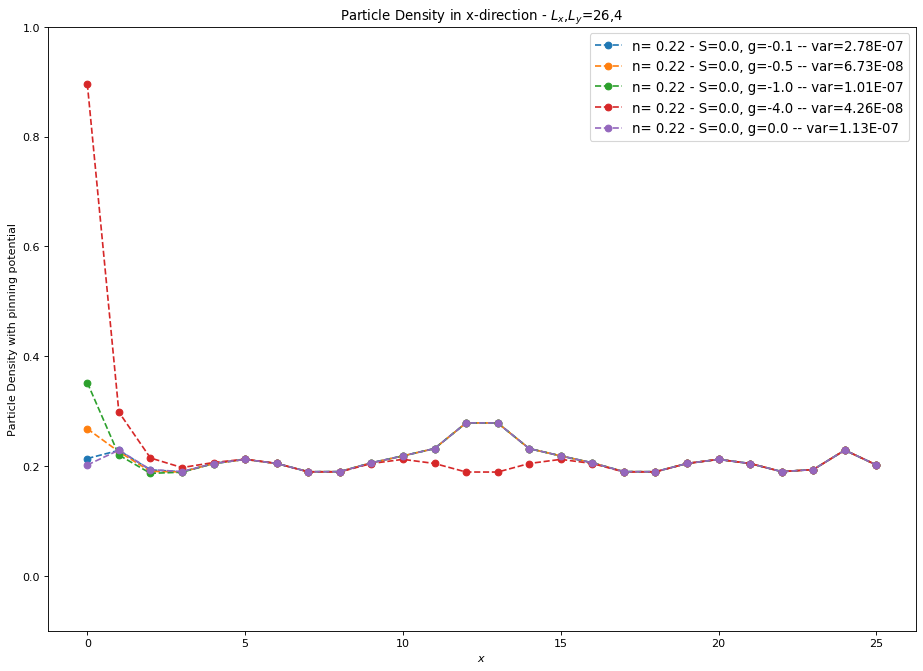

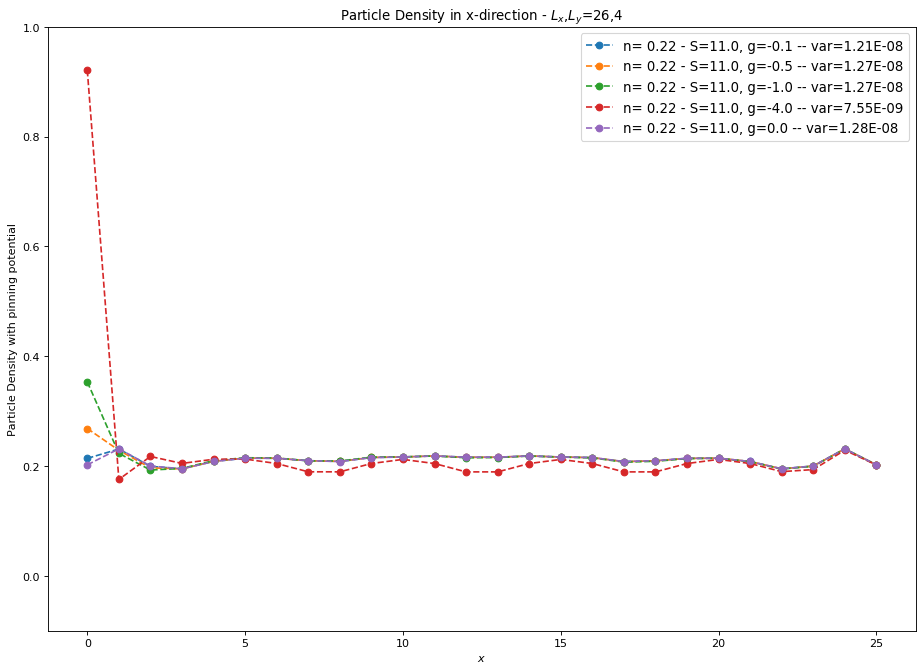

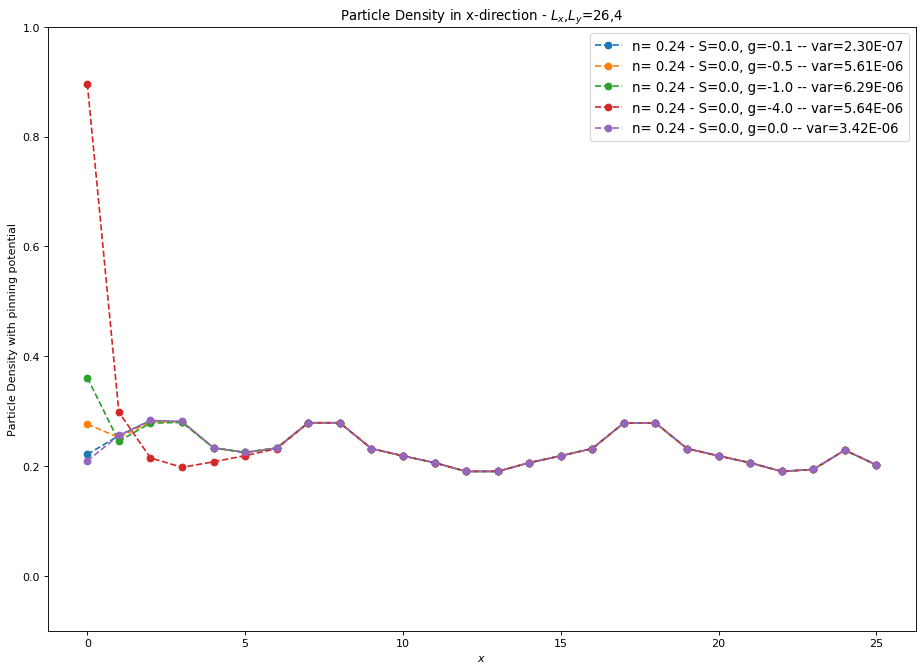

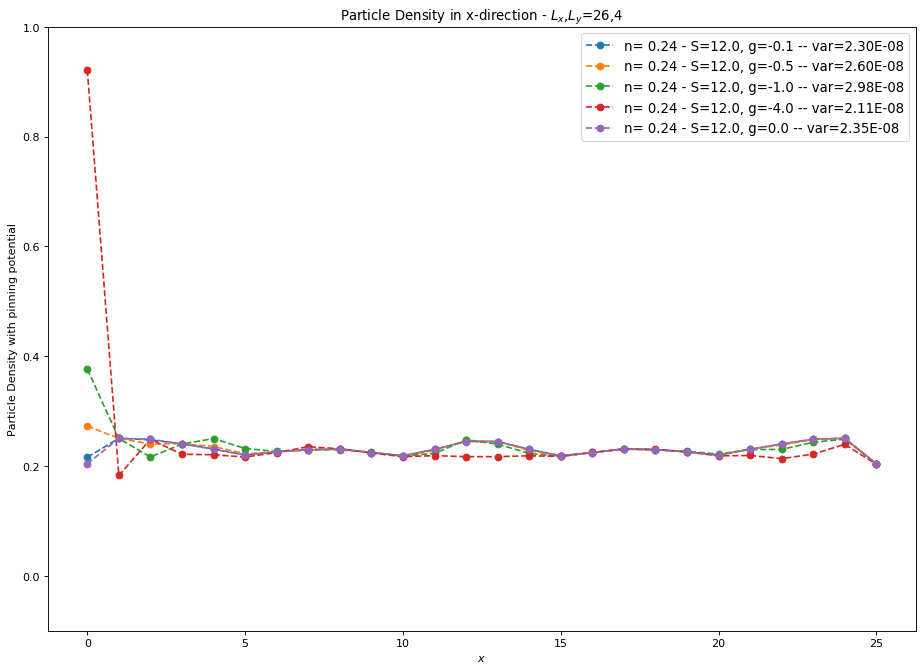

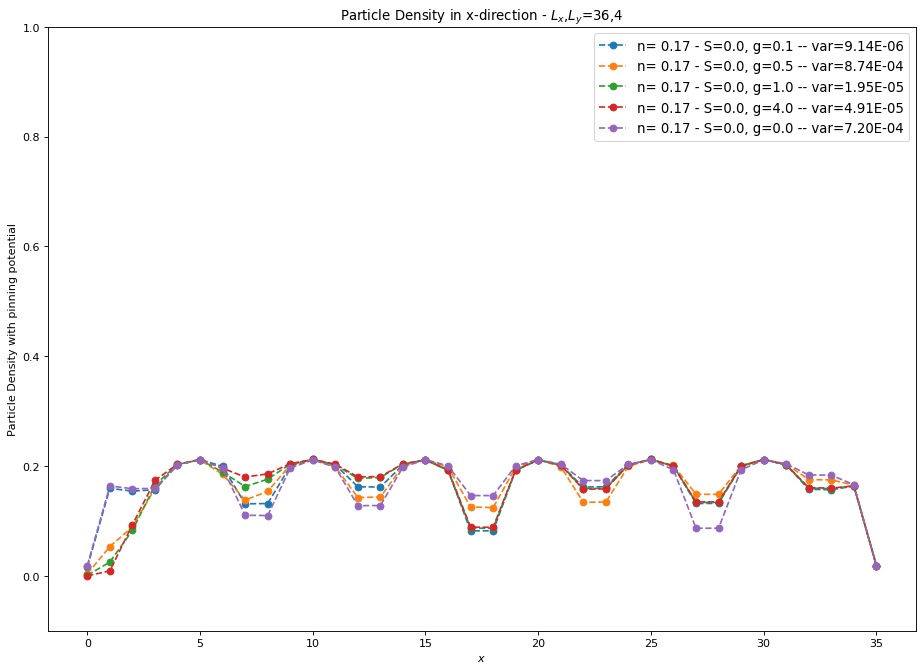

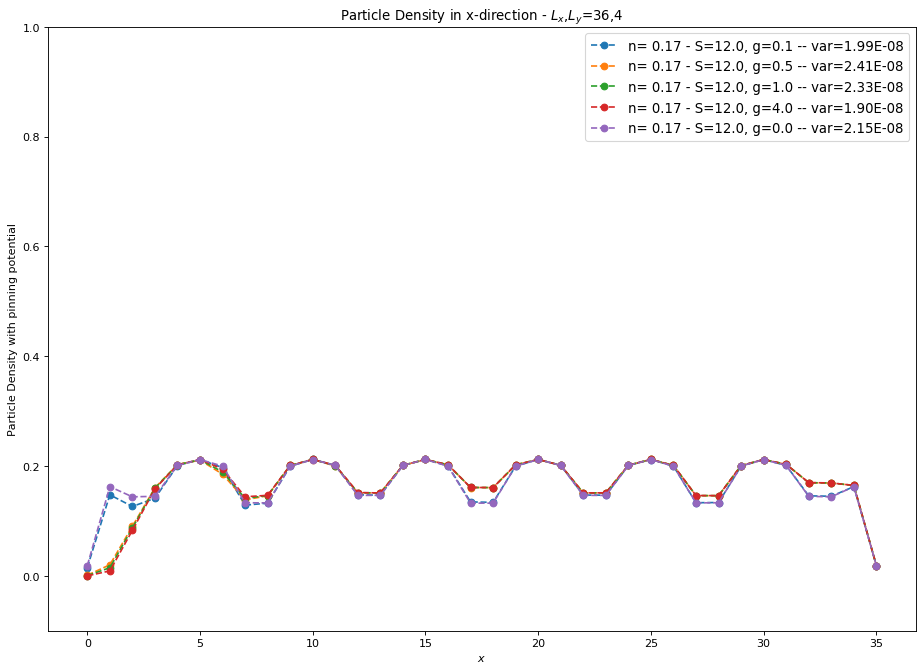

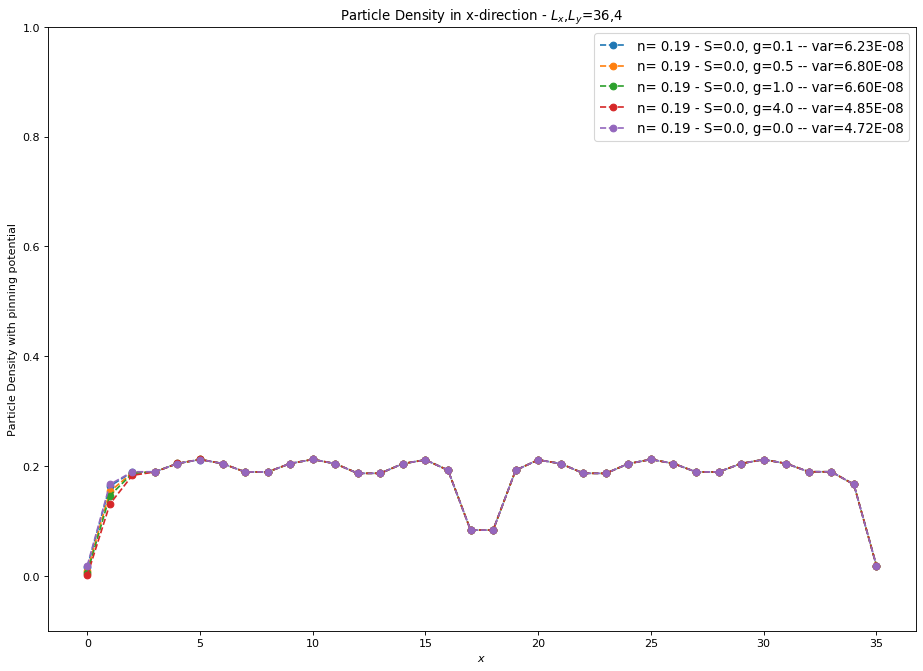

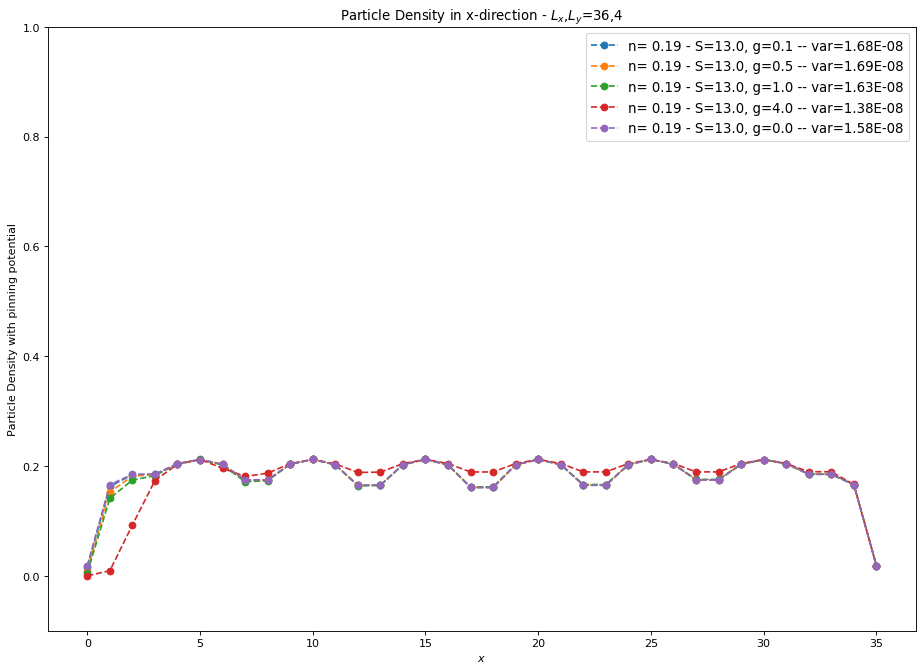

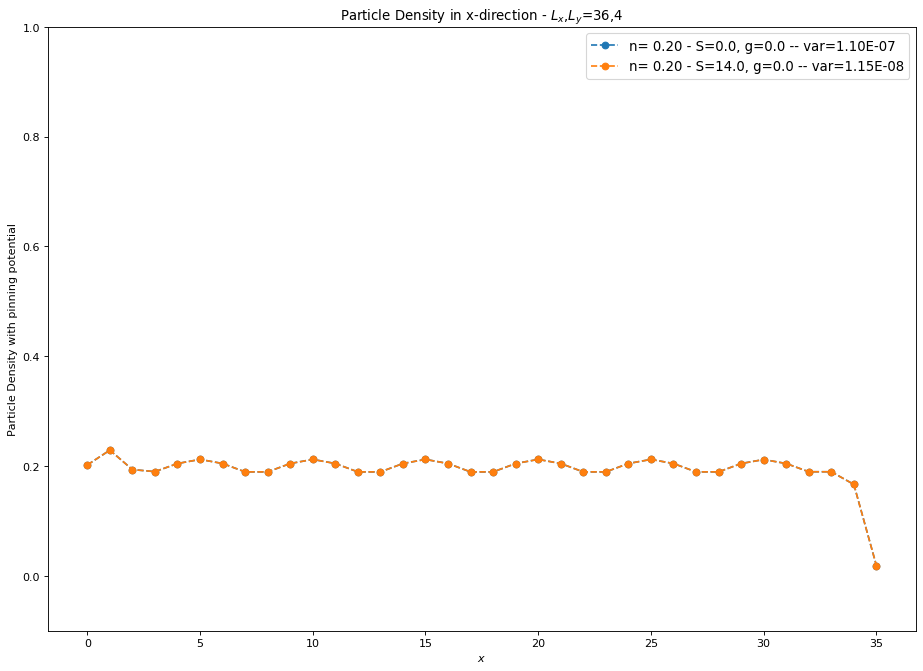

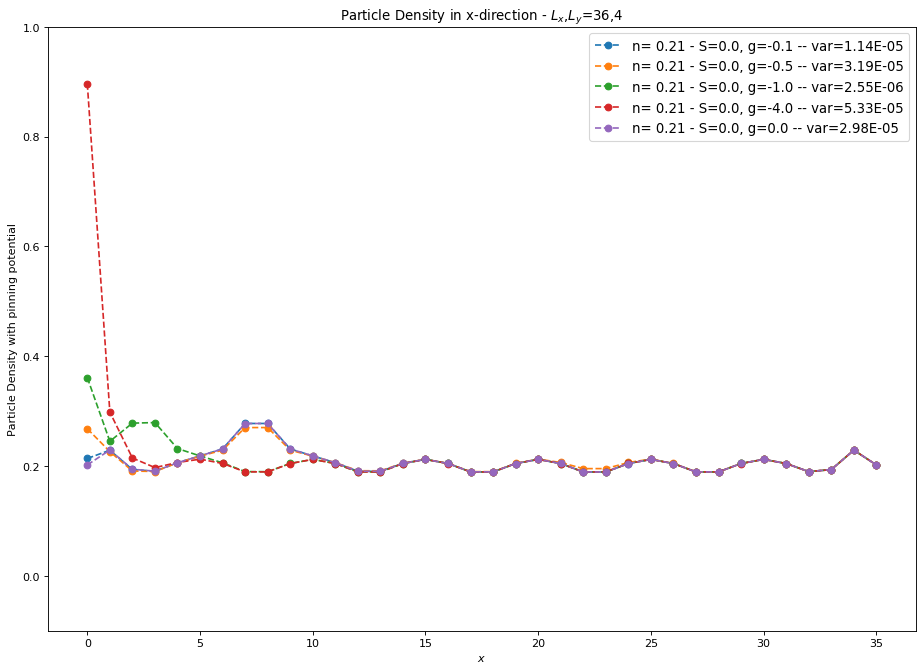

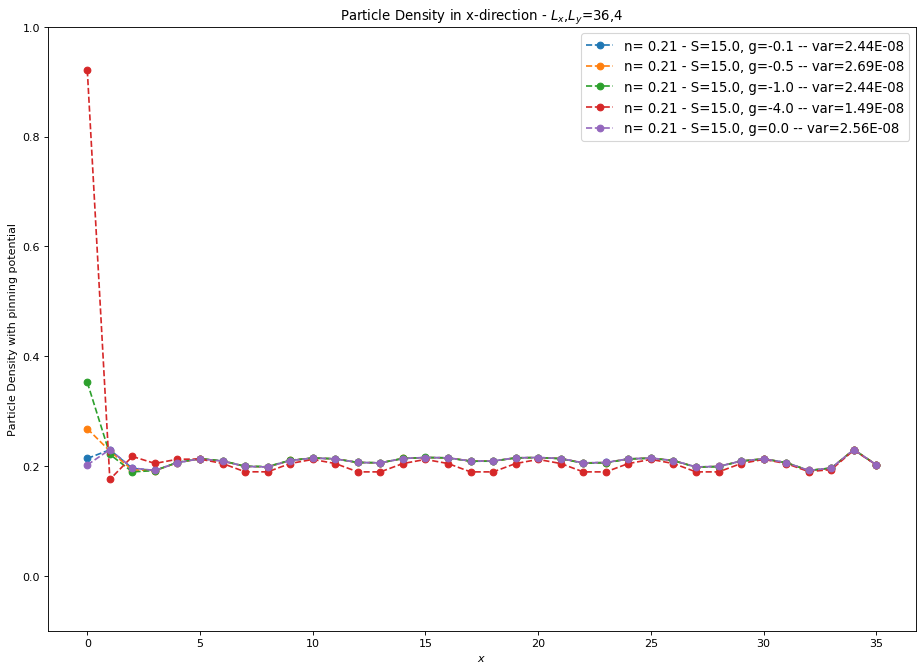

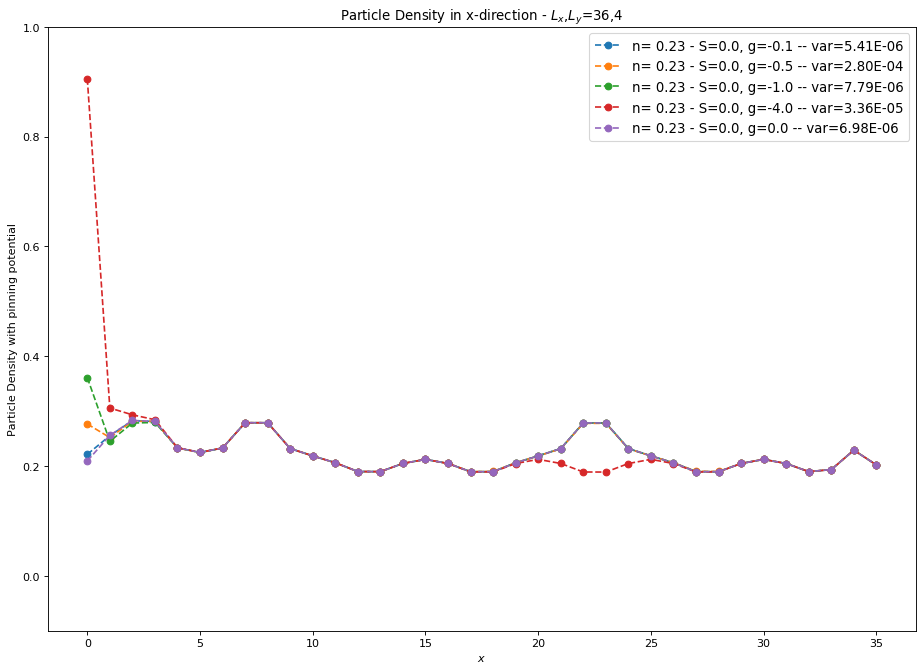

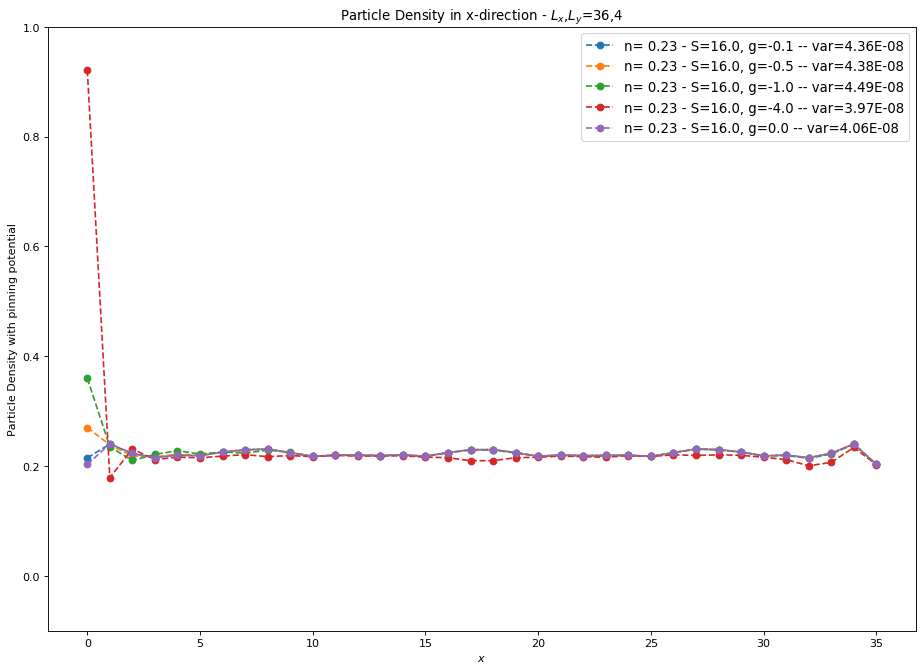

In [29]:
par = p
g_arr = np.array([0.1, -0.1, 0.5, -0.5, 1.0, -1.0, 4.0, -4.0, 0.])
tar_loc_n="../codes/data/dat-files-03-expc-arr/n-arr/"
s_arrays = [np.array([0]), np.array([1])]
y_0=0
y_lim_up=0.9; y_lim_down=-0.9


pre_str = "DMRG_pin_dens_01"
Lx_arr = [26, 36]
Ly_arr = [5]
for Lx in Lx_arr:
    for Ly in Ly_arr:
        idx = 0
        par.Lx=Lx; par.Ly=Ly;par.Nphi=(par.Lx-1)*par.Ly*0.2;
        filling_arrs = [np.arange(int(par.Nphi//2*2)-4, int(par.Nphi//2*2)-2, 2),
                        np.arange(int(par.Nphi//2*2)-2, int(par.Nphi//2*2)-0, 2),
             np.arange(int(par.Nphi//2*2)+0, int(par.Nphi//2*2)+2, 2),
             np.arange(int(par.Nphi//2*2)+2, int(par.Nphi//2*2)+4, 2),
             np.arange(int(par.Nphi//2*2)+4, int(par.Nphi//2*2)+6, 2), 
             np.arange(int(par.Nphi//2*2)+6, int(par.Nphi//2*2)+8, 2)]
        for n_arr in filling_arrs[1:]:
            for s_arr in s_arrays:
                idx += 1
                y_lim_up=1.0; y_lim_down=-0.1
                '''
                if idx == 5:
                    s_arr = np.array([0,1])
                if idx == 6 and s_arr==1:
                    idx += -1
                    continue
                '''
                vs = str(idx).zfill(2)
                if s_arr[0] == 1:
                    y_lim_up=1.0; y_lim_down=-0.1

                do_plot_density(par, n_arr, g_arr, s_arr, tar_loc_n, y_0, y_lim_up, y_lim_down, 
                                "upper right", pre_str, vs)


In [13]:
#plot
c_locs=[0, p1.Lx-1, p1.Lx//2]
plt.figure(figsize=(14, 10), dpi=80)
for M in np.arange(6, 20, 2):
    for s in range(1):
        for i in range(len(c_locs)-2):
            p1.N=M; i=0
            p1.S=float(p1.N/2)*s
            SS=helpers.load_arr_high_bond(p1, tar_loc_corr, chis, "ss");
            nn=helpers.load_arr_high_bond(p1, tar_loc_corr, chis, "nn");
            n = helpers.load_arr_high_bond(p1, tar_loc_n, chis, "n")
            X = SS[i, :, 1].astype(int)
            Y = SS[i, :, 0]
            Y = np.divide(Y - 3/4*nn[i, :, 0], n[X, 0])/n[c_locs[i],0] 
            Y = np.divide(nn[0, 1:, 0], n[X[1:],0])/n[0,0] - 1
            plt.plot(X[1:], Y, '--o',label="n= " + str(p1.N/(p1.Lx*p1.Ly))+ " - " + "S="+str(p1.S) )

        
        
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("$x$")
plt.ylabel("Correlation - $g_{center,r}$")
#plt.yscale('log')
y_lim = 2
#plt.ylim(-y_lim, y_lim)
plt.title("Correlation in x-direction - with y=0 - Lx,Ly=" + str(p1.Lx)+ "," + str(p1.Ly)  + " - Spin_i location= " + str(c_locs[i]))
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc ="upper right", prop={'size':12})
#plt.axhline(y=0.0, color='r', linestyle='-')

  
# To load the display window
plt.show()

UnboundLocalError: local variable 'Corr_Arr' referenced before assignment

<Figure size 1120x800 with 0 Axes>

In [11]:
#plot
c_locs=[0, p1.Lx-1, p1.Lx//2]
plt.figure(figsize=(14, 10), dpi=80)
for M in np.arange(8, 16, 2):
    for s in range(1):
        p1.N=M; i=2
        #p1.Nphi=float(M)
        p1.S=float(p1.N/2)*0
        n = helpers.load_arr_high_bond(p1, tar_loc_n, chis, "n")
        X = np.arange(0, n.shape[0])
        #Y = np.sum(n, axis=1)/p1.Ly
        Y = n[:,0]
        plt.plot(X, Y, '--o',label="n= " + str(p1.N/(p1.Lx*p1.Ly))+ " - " + "S="+str(p1.S) )

        
        
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("$x$")
plt.ylabel("Correlation - $g_{center,r}$")
#plt.yscale('log')
y_lim = 2
#plt.ylim(-y_lim, y_lim)
plt.title("Particle Density in x-direction - Lx,Ly=" + str(p1.Lx)+ "," + str(p1.Ly)  + " - Spin_i location= " + str(c_locs[i]))
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc ="lower right", prop={'size':12})
#plt.axhline(y=0.0, color='r', linestyle='-')

  
# To load the display window
plt.show()

UnboundLocalError: local variable 'Corr_Arr' referenced before assignment

<Figure size 1120x800 with 0 Axes>